![cover](./images/uber-eats-decade-review-2948.jpeg)

# NLP-App-Sentiment-Analysis
Author: Jennifer Ha
***

## Overview
How the world eats is changing dramatically. A little under two decades ago, restaurant-quality meal delivery was still largely limited to foods such as pizza and Chinese. Nowadays, food delivery has become a global market worth more than $150 billion, having more than tripled since 2017. In the United States, the market has more than doubled during the COVID-19 pandemic, following healthy historical growth of 8 percent (Source: [McKinsey](https://www.mckinsey.com/industries/technology-media-and-telecommunications/our-insights/ordering-in-the-rapid-evolution-of-food-delivery)).

Food delivery apps are offering a more convenient way for people to get the meals that they want. Therefore, hungry users are willing to pay additional charges and delivery fees to have it delivered to their front door. These types of apps aren’t going anywhere anytime soon. More than likely, they’re here to stay — for good. 

## Business Understanding
The goal of this analysis is to determine what characteristics of Food Delivery apps currently available on the iOS App Store resonate well with the users and what can be improved. Through sentiment analysis of text reviews and their corresponding ratings, we will examine what words are more likely to indicate a positive vs a negative app review.

The analysis will help our potential client by providing insights into how to develop a strategy for building a new mental health app that can compete with apps that have already seen success.




## Data
Besides the major players based in the US, I also chose some other successful apps around the world that are still big enough to run their business in the US. I came up with a list of 10 food delivery apps and compiled the dataset for this analysis through [app review scraping](https://github.com/jennifernha/NLP-App-Reviews-Sentiment-Analysis/blob/main/Data-Collection.ipynb), which includes text reviews paired with rating out of 5 for 10 food delivery apps. 

The review texts will be our independent variables, and our target variable will be the rating out of 5.

In [1]:
# Import all libraries & packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import os
#import glob
import string
#from PIL import Image
#import urllib.request
from functions import *

# Import standard packages for Natural Language Processing
import nltk
from nltk import FreqDist, word_tokenize, regexp_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud

# Importa SciKit Learn packages for modeling and model evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import classification_report, plot_roc_curve
from sklearn.metrics import plot_confusion_matrix, roc_curve

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
# Set random seed
np.random.seed(27)

# Set no limit to column width to view full review text
pd.options.display.max_colwidth = None

## Importing Data

In [3]:
# Compile the scrapped app review data
all_files = [
    'https://raw.githubusercontent.com/jennifernha/NLP-App-Reviews-Sentiment-Analysis/master/data/caviar-order-food-delivery.csv',
    'https://raw.githubusercontent.com/jennifernha/NLP-App-Reviews-Sentiment-Analysis/master/data/deliveroo-food-delivery.csv',
    'https://raw.githubusercontent.com/jennifernha/NLP-App-Reviews-Sentiment-Analysis/master/data/doordash-food-delivery.csv',
    'https://raw.githubusercontent.com/jennifernha/NLP-App-Reviews-Sentiment-Analysis/master/data/foodpanda-food-delivery.csv',
    'https://raw.githubusercontent.com/jennifernha/NLP-App-Reviews-Sentiment-Analysis/master/data/grubhub-local-food-delivery.csv',
    'https://raw.githubusercontent.com/jennifernha/NLP-App-Reviews-Sentiment-Analysis/master/data/postmates-fast-delivery.csv',
    'https://raw.githubusercontent.com/jennifernha/NLP-App-Reviews-Sentiment-Analysis/master/data/seamless-local-food-delivery.csv',
    'https://raw.githubusercontent.com/jennifernha/NLP-App-Reviews-Sentiment-Analysis/master/data/toast-takeout-delivery.csv',
    'https://raw.githubusercontent.com/jennifernha/NLP-App-Reviews-Sentiment-Analysis/master/data/uber-eats-food-delivery.csv',
    'https://raw.githubusercontent.com/jennifernha/NLP-App-Reviews-Sentiment-Analysis/master/data/zomato-food-delivery-dining.csv'
]
    

In [4]:
# Create a list of all loaded DataFrames
df_list = []

for file in all_files:
    temp_df = pd.read_csv(file)
    df_list.append(temp_df)

In [5]:
# Concatenate all tables into a single DataFrame
df = pd.concat(df_list, axis=0, ignore_index=True)
df

,date,userName,title,review,rating,isEdited,app_name,app_id,developerResponse
0,9/17/20 17:12,Good64774,Mixed feelings,"Caviar used to be a great app. Top quality restaurants, working app, good service. But they recently merged with DoorDash which I have found to be a notoriously worse app. Since the merger, the app seemed to change and your delivery drivers are now from “Dashers”. When you order now and have an issue and try to chat Caviar sometimes their servers are down or you can’t get a hold of them. Your left to call the restaurant who may tell you your food has been ready for a half hour but DoorDash/Caviar hasn’t picked it up and is unreachable right now. Typical DoorDash problems. Although the app needs work and the DoorDash merger is disappointing. When I finally have been able to reach the company and explain various issues. Caviar does issue refunds and credits. This is a positive that some apps like UberEats or Postmates rarely provide. Caviar’s credits/refunds are close to the high level of Seamless/Grubhub. Only reason Seamless/Grubhub are better in this area is refunds and credits can be issued automatically in the app with ease if you run into issues. Caviar, as mentioned above can be difficult to reach and requires more explanation. Ultimately if the Caviar app improves the accessibility of their customer service and they continue to provide credits, I would consider changing my review back to 5 stars. On the other hand, if I keep running into these app issues or if they stop providing credits and refunds for issues I would lower the rating. I’m on the fence.",5,False,caviar-order-food-delivery,931355786,NaN
1,5/20/20 18:18,weterpest,"Unreliable, Unhelpful","They have such a great selection of restaurants but service is SO unreliable! I have ordered maybe 5 times through them and the last three have all been really frustrating.\n\nThe last time I kept calling saying that the driver’s location on the map was not updating and the estimated delivery time kept getting pushed back. The customer service people would just read the estimated delivery time and disconnect the chat without ever reaching out to the driver. Two and a half hours after my food had been picked up and still not delivered, I finally figured out that the driver had car issues and the order was cancelled (3+ hours after being placed). This same type of situation has happened two times other times with the driver having car issues after picking up my order and getting here super late with food that has been sitting out in a car for at least an hour after being picked up, and customer service just doesn’t really do anything to figure it out or get a replacement order sent. I get that car issues happen, but three times in a row with this app isn’t a great track record considering that this has NEVER happened with competitor apps. \n\nI was really excited when I found Caviar because of the really great selection of restaurants, but I ended up deleting my account after this last time.",2,False,caviar-order-food-delivery,931355786,NaN
2,11/4/20 0:18,Mighty Power,Deliveries take too long,"Well for the last six months understanding pandemic aside because Uber and seamless are doing the same and they are not as late as they are and you are able to reach them, they apologize and always find the best solution or at least give you a credit to make it worthwhile. Caviar support team is easy on saying goodbyes, take a long time and then get back to you with no answer or problem fix, so for the last 10 or so orders all close by restaurants from my house, I waited about an hour to find out the driver was lost and was calling me in Spanish or the driver never showed up, and mostly I had to basically cancel the order and re-order again, I am finding out that the only way to get an order is to first order and then contact Support to make sure they are reaching out to somebody to get your food picked up, I can’t be using an app as such and always waiting around an 

## Data Preparation

In [6]:
# Get summary of the DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67033 entries, 0 to 67032
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               67033 non-null  object
 1   userName           67033 non-null  object
 2   title              67033 non-null  object
 3   review             67033 non-null  object
 4   rating             67033 non-null  int64 
 5   isEdited           67033 non-null  bool  
 6   app_name           67033 non-null  object
 7   app_id             67033 non-null  int64 
 8   developerResponse  17242 non-null  object
dtypes: bool(1), int64(2), object(6)
memory usage: 4.2+ MB


In [7]:
# Check value counts for isEdited column
df['isEdited'].value_counts()

False    66093
True       940
Name: isEdited, dtype: int64

In [8]:
# Check value counts for developerResponse column
(df['developerResponse'].isna()).value_counts()

True     49791
False    17242
Name: developerResponse, dtype: int64

In [9]:
# Preview sample developer responses
df[df['developerResponse'].isna()==False]

,date,userName,title,review,rating,isEdited,app_name,app_id,developerResponse
3,12/24/18 2:52,anogawa,Horrendous customer service,"I would say the app experience is superior to other delivery apps, which is a shame because the customer service is terrible. \n\nOur expected delivery time upon ordering was 8:24 pm, which eventually got pushed back to 8:49 pm. The app notified us of the delay, which is better than other food delivery apps in which I’ve experienced delays but wasn’t notified. However, when order finally arrived, my husband noticed the delivery guy gave us the wrong order. Turns out he had given our order to the wrong person. Driver says he’ll contact support, saying they’ll probably re-deliver. I contact customer support on my own, and the rep offers a refund...okay, but at this point it’s past 9 pm and we still haven’t had dinner. I reply back saying it’s not okay. Rep blames it on me, saying that I selected that the items were missing and I preferred a refund. Except there are no options for “my driver messed up, get me a new order asap”. Eventually he offers $10. Their twitter account offers me $30, saying the restaurant is closed, which is why a re-delivery wasn’t available. \n\nThe correct response would have been to offer expedited delivery form another restaurant. At this point, I am not going to use this app again and will not recommend this app to my friends. Note to the developers: there are other food delivery apps out there, you are the new guy and you need to do more to stand out besides offer different restaurant selections.",1,False,caviar-order-food-delivery,931355786,"{'id': 6547062, 'body': ""Thanks for the feedback and I'm so sorry to hear about the issue you've experienced. We strive to provide the best experience with our support as possible, and clearly, we fell short here. Could you send us more details of your experience at trycaviar.com/contact with ATTN: Angie in the subject line? I'd be happy to help find a proper resolution."", 'modified': '2018-12-25T23:56:02Z'}"
5,6/4/19 0:34,LJS57,Bad Service for the Outrageous Delivery & Service Fees,"UPDATE: I contacted customer service as directed below. The short answer is, they aren’t willing to refund orders, it’s against their policy. Even if it shows up over an hour late (nearly 2 hours after the order was placed) and is cold and soggy- I’ve already gotten more than one credit for poor service. What I want is my money back. I informed them I’d be deleting the app, and got a canned response saying we hope this experience doesn’t reflect badly on them. I am deleting the app and will be ordering from DoorDash moving forward. DoorDash is now picking up many of the restaurants that were once specific to Caviar, they’re timely, and their fees are lower. I’m sorry Caviar, I tried. \n. . . . . . \nIf the food ever got to me in a timely manner, or even lukewarm, I wouldn’t be complaining. That said, nearly every time I’ve ever use this service, the delivery time increased from the posted 45-55 minutes, to 1.5-2 hours. That’s ridiculous. I wonder how they treat their restaurants as well because more than once I’ve received strange inaccurate orders- for example, a salad will show up bare (just a container of lettuce, minus any of the listed ingredients from the site), or most frequently, anything I add on as “extra” to a dish I get charged for, but the “extra” isn’t included. I’ve requested refunds, with no response. It’s a shame bc they work with some good places.",1,True,caviar-order-food-delivery,931355786,"{'id': 8970235, 'body': ""Thanks for the feedback and I'm so sorry to hear about the issue you've experienced. We strive to provide the best experience with our service and support as possible, and clearly we fell short here. Could you send us more details of your experience at trycaviar.com/contact with ATTN: Aicea in the subject line? I'd be happy to help find a proper resolution."", 'modified': '2019-06-04T00:34:55Z'}"
11,9/16/18 0:30,ndavidso

### Removing Duplicates

In [10]:
# Check for duplicates
df.title.duplicated().sum()

19571

In [11]:
# Check for duplicated rows
df[df.duplicated(keep=False)].sort_values('title')

,date,userName,title,review,rating,isEdited,app_name,app_id,developerResponse
1674,9/6/18 23:56,IFS123,Horrible horrible service in downtown Boston,You order something and it says it will\ntake an hour...then an 1.15....then 1.5....then 2.5 hours. \n\nThis is the third time this has happened to me. Never ordering from caviar again.,1,False,caviar-order-food-delivery,931355786,NaN
1675,9/6/18 23:56,IFS123,Horrible horrible service in downtown Boston,You order something and it says it will\ntake an hour...then an 1.15....then 1.5....then 2.5 hours. \n\nThis is the third time this has happened to me. Never ordering from caviar again.,1,False,caviar-order-food-delivery,931355786,NaN
21354,2017-12-18 22:38:24,Alaskagrown57,ORDERED MULTIPLE TIMES,I have ordered from different restaurants but always come back to this restaurant. The food is great and the delivery guy is always friendly. My food usually comes before the designated time and what I ordered has been right each time!!!! Maybe once it was a little late but that is because I live in moble home park and sometimes it is hard to find!!!!,5,False,grubhub-local-food-delivery,302920553,NaN
22086,2017-12-18 22:38:24,Alaskagrown57,ORDERED MULTIPLE TIMES,I have ordered from different restaurants but always come back to this restaurant. The food is great and the delivery guy is always friendly. My food usually comes before the designated time and what I ordered has been right each time!!!! Maybe once it was a little late but that is because I live in moble home park and sometimes it is hard to find!!!!,5,False,grubhub-local-food-delivery,302920553,NaN
21514,2017-12-10 21:23:44,Catzarn,Pretty Good!,"They work with a lot of restaurants and whenever I have an issue, the support staff always helps me resolve it.\n\nThere is a slight issue with the drivers having a small problem finding my apartment, they always go into my alley behind my building or to an address two blocks over, but that is more of their GPS/maps problem than theirs.",5,False,grubhub-local-food-delivery,302920553,NaN
22336,2017-12-10 21:23:44,Catzarn,Pretty Good!,"They work with a lot of restaurants and whenever I have an issue, the support staff always helps me resolve it.\n\nThere is a slight issue with the drivers having a small problem finding my apartment, they always go into my alley behind my building or to an address two blocks over, but that is more of their GPS/maps problem than theirs.",5,False,grubhub-local-food-delivery,302920553,NaN
21357,2017-12-15 02:56:55,Christian-In-Training,Questionable Drivers,"Placed an order THREE TIMES with them and the drivers decided not to come. Gave them instructions every single time about my apartment number. Instead of calling me about getting into my gated community with the passcode, they decided to just skip it. I called Grubhub and every time (almost 20 minute wait time each time) I told them to inform the driver to call me so I can let them in. Never happened. The customer service agents were not helpful. Even their supervisor Diana was just a jerk. 3 hours later I ended up having to go get it myself. Sometimes the “convenience” isn’t worth it.",1,False,grubhub-local-food-delivery,302920553,NaN
22174,2017-12-15 02:56:55,Christian-In-Training,Questionable Drivers,"Placed an order THREE TIMES with them and the drivers decided not to come. Gave them instructions every single time about my apartment number. Instead of calling me about getting into my gated community with the passcode, they decided to just skip it. I called Grubhub and every time (almost 20 minute wait time each time) I told them to inform the driver to call me so I can let them in. Never happened. The customer service agents were not helpful. Even their supervisor Diana was just a jerk. 3 hours later I ended up having to go get it myself. Sometimes the “convenience” isn’t worth it.",1,False,grubhub-local-food-delivery,302920553,NaN


In [12]:
# Remove duplicated rows
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67029 entries, 0 to 67032
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               67029 non-null  object
 1   userName           67029 non-null  object
 2   title              67029 non-null  object
 3   review             67029 non-null  object
 4   rating             67029 non-null  int64 
 5   isEdited           67029 non-null  bool  
 6   app_name           67029 non-null  object
 7   app_id             67029 non-null  int64 
 8   developerResponse  17242 non-null  object
dtypes: bool(1), int64(2), object(6)
memory usage: 4.7+ MB


In [13]:
# Check for multiple reviews for same app from same user
df[df.duplicated(['userName', 'app_name'], keep=False)]

,date,userName,title,review,rating,isEdited,app_name,app_id,developerResponse
38803,2018-09-11 23:16:10,Marcus350,I can’t use coupon,I got 10$ off on order made by app but I can use it because when I’m trying to checkout I’m getting message that order can’t be processed because for pick up I have to add phone number and @ address. And the best part of it that my phone and @ is in the system. When I removed coupon order went threw without any issue.,1,False,seamless-local-food-delivery,381840917,"{'id': 5675538, 'body': ""Oh No Marcus350! We're so sorry to hear that you're having the issues when using promotional codes. Please give us a call 800-256-1020 before check out and we're happy to help troubleshoot those promos with you! You can also check https://www.seamless.com/promoterms for full details."", 'modified': '2018-10-26T15:59:46Z'}"
40332,2018-09-11 23:43:11,Marcus350,Impossible to order by app,It is impossible to order by app it showing error message,1,False,seamless-local-food-delivery,381840917,"{'id': 5109101, 'body': 'Hi Marcus350! We are so sorry that you are experiencing issues with using the app. We would love the opportunity to resolve any issues that you may be experiencing. Please contact our Customer Care Team by giving us a call at (877) 256-1020. Thank you for choosing Seamless!', 'modified': '2018-09-19T01:31:36Z'}"
61065,2019-07-12 19:49:02,mohammedalhashimi,if you want your food late and cold ..... use this app,I have been using this app over a year and always my orders are late.,1,False,zomato-food-delivery-dining,434613896,"{'id': 9686084, 'body': 'Hi there, apologies for the inconvenience caused. Kindly drop us a mail (order@zomato.com) regarding this so that we can look in to what went wrong. Thanks.', 'modified': '2019-07-16T11:25:55Z'}"
61066,2019-07-12 19:49:02,mohammedalhashimi,if you want your food late and cold ..... use this app,I have been using this app over a year and always my orders are late.,1,False,zomato-food-delivery-dining,434613896,"{'id': 9686086, 'body': 'Hi there, apologies for the inconvenience caused. Kindly drop us a mail (order@zomato.com) regarding this so that we can look in to what went wrong. Thanks.', 'modified': '2019-07-16T11:25:58Z'}"


Taking a closer look, we can see Marcus350 indeed wrote two separate reviews at a different time while mohammedalhashimi wrote the same review twice with the same timestamp. Therefore, we will remove one of this user's review. 

In [14]:
# delete a single row by index value 0
df = df.drop(labels=61066, axis=0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67028 entries, 0 to 67032
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               67028 non-null  object
 1   userName           67028 non-null  object
 2   title              67028 non-null  object
 3   review             67028 non-null  object
 4   rating             67028 non-null  int64 
 5   isEdited           67028 non-null  bool  
 6   app_name           67028 non-null  object
 7   app_id             67028 non-null  int64 
 8   developerResponse  17241 non-null  object
dtypes: bool(1), int64(2), object(6)
memory usage: 4.7+ MB


### Feature Engineering
Since both the title and review columns include text that are relevant to our analysis, we will combine them into one column. This will allow us to simultaneously examine information in both columns. 

In [15]:
# Combine title and review column to get full review text
df['combined_text'] = df['title'] + ". " + df['review']
df

,date,userName,title,review,rating,isEdited,app_name,app_id,developerResponse,combined_text
0,9/17/20 17:12,Good64774,Mixed feelings,"Caviar used to be a great app. Top quality restaurants, working app, good service. But they recently merged with DoorDash which I have found to be a notoriously worse app. Since the merger, the app seemed to change and your delivery drivers are now from “Dashers”. When you order now and have an issue and try to chat Caviar sometimes their servers are down or you can’t get a hold of them. Your left to call the restaurant who may tell you your food has been ready for a half hour but DoorDash/Caviar hasn’t picked it up and is unreachable right now. Typical DoorDash problems. Although the app needs work and the DoorDash merger is disappointing. When I finally have been able to reach the company and explain various issues. Caviar does issue refunds and credits. This is a positive that some apps like UberEats or Postmates rarely provide. Caviar’s credits/refunds are close to the high level of Seamless/Grubhub. Only reason Seamless/Grubhub are better in this area is refunds and credits can be issued automatically in the app with ease if you run into issues. Caviar, as mentioned above can be difficult to reach and requires more explanation. Ultimately if the Caviar app improves the accessibility of their customer service and they continue to provide credits, I would consider changing my review back to 5 stars. On the other hand, if I keep running into these app issues or if they stop providing credits and refunds for issues I would lower the rating. I’m on the fence.",5,False,caviar-order-food-delivery,931355786,NaN,"Mixed feelings. Caviar used to be a great app. Top quality restaurants, working app, good service. But they recently merged with DoorDash which I have found to be a notoriously worse app. Since the merger, the app seemed to change and your delivery drivers are now from “Dashers”. When you order now and have an issue and try to chat Caviar sometimes their servers are down or you can’t get a hold of them. Your left to call the restaurant who may tell you your food has been ready for a half hour but DoorDash/Caviar hasn’t picked it up and is unreachable right now. Typical DoorDash problems. Although the app needs work and the DoorDash merger is disappointing. When I finally have been able to reach the company and explain various issues. Caviar does issue refunds and credits. This is a positive that some apps like UberEats or Postmates rarely provide. Caviar’s credits/refunds are close to the high level of Seamless/Grubhub. Only reason Seamless/Grubhub are better in this area is refunds and credits can be issued automatically in the app with ease if you run into issues. Caviar, as mentioned above can be difficult to reach and requires more explanation. Ultimately if the Caviar app improves the accessibility of their customer service and they continue to provide credits, I would consider changing my review back to 5 stars. On the other hand, if I keep running into these app issues or if they stop providing credits and refunds for issues I would lower the rating. I’m on the fence."
1,5/20/20 18:18,weterpest,"Unreliable, Unhelpful","They have such a great selection of restaurants but service is SO unreliable! I have ordered maybe 5 times through them and the last three have all been really frustrating.\n\nThe last time I kept calling saying that the driver’s location on the map was not updating and the estimated delivery time kept getting pushed back. The customer service people would just read the estimated delivery time and disconnect the chat without ever reaching out to the driver. Two and a half hours after my food had been picked up and still not delivered, I finally figured out that the driver had car issues and the order was cancelled (3+ hours after being placed). This same type of situation has happened two times other times with the driver having car issues after picking up my order and

In [16]:
# Create a variable "corpus" containing all text
corpus = df['combined_text'].to_list()


In [17]:
corpus[3]

'Horrendous customer service. I would say the app experience is superior to other delivery apps, which is a shame because the customer service is terrible. \n\nOur expected delivery time upon ordering was 8:24 pm, which eventually got pushed back to 8:49 pm. The app notified us of the delay, which is better than other food delivery apps in which I’ve experienced delays but wasn’t notified. However, when order finally arrived, my husband noticed the delivery guy gave us the wrong order. Turns out he had given our order to the wrong person. Driver says he’ll contact support, saying they’ll probably re-deliver. I contact customer support on my own, and the rep offers a refund...okay, but at this point it’s past 9 pm and we still haven’t had dinner. I reply back saying it’s not okay. Rep blames it on me, saying that I selected that the items were missing and I preferred a refund. Except there are no options for “my driver messed up, get me a new order asap”. Eventually he offers $10. Their

In [18]:
# Replace all new-line characters with space
df['combined_text'] = df['combined_text'].replace(r'\n',' ', regex=True) 

# Create a variable "corpus" containing all text and verify
corpus = df['combined_text'].to_list()
corpus[3]

'Horrendous customer service. I would say the app experience is superior to other delivery apps, which is a shame because the customer service is terrible.   Our expected delivery time upon ordering was 8:24 pm, which eventually got pushed back to 8:49 pm. The app notified us of the delay, which is better than other food delivery apps in which I’ve experienced delays but wasn’t notified. However, when order finally arrived, my husband noticed the delivery guy gave us the wrong order. Turns out he had given our order to the wrong person. Driver says he’ll contact support, saying they’ll probably re-deliver. I contact customer support on my own, and the rep offers a refund...okay, but at this point it’s past 9 pm and we still haven’t had dinner. I reply back saying it’s not okay. Rep blames it on me, saying that I selected that the items were missing and I preferred a refund. Except there are no options for “my driver messed up, get me a new order asap”. Eventually he offers $10. Their t

## Exploratory Data Analysis (EDA)
Prior to analyzing the text data, we will examine the dataset at a higher level to get a better understanding of the data we are working with. 
1. Number of Reviews Distribution by App
2. Average Rating by App 
3. Rating Distribution of All Apps 
4. Rating Distribution of Apps with Most Reviews (Top 5)

### 1. Number of Reviews Distribution by App

In [19]:
# Check distribution of reviews for each app
df['app_name'].value_counts(normalize=True)

uber-eats-food-delivery         0.149191
seamless-local-food-delivery    0.149191
doordash-food-delivery          0.149191
postmates-fast-delivery         0.149191
grubhub-local-food-delivery     0.149147
zomato-food-delivery-dining     0.124754
caviar-order-food-delivery      0.060512
foodpanda-food-delivery         0.038894
deliveroo-food-delivery         0.018977
toast-takeout-delivery          0.010951
Name: app_name, dtype: float64

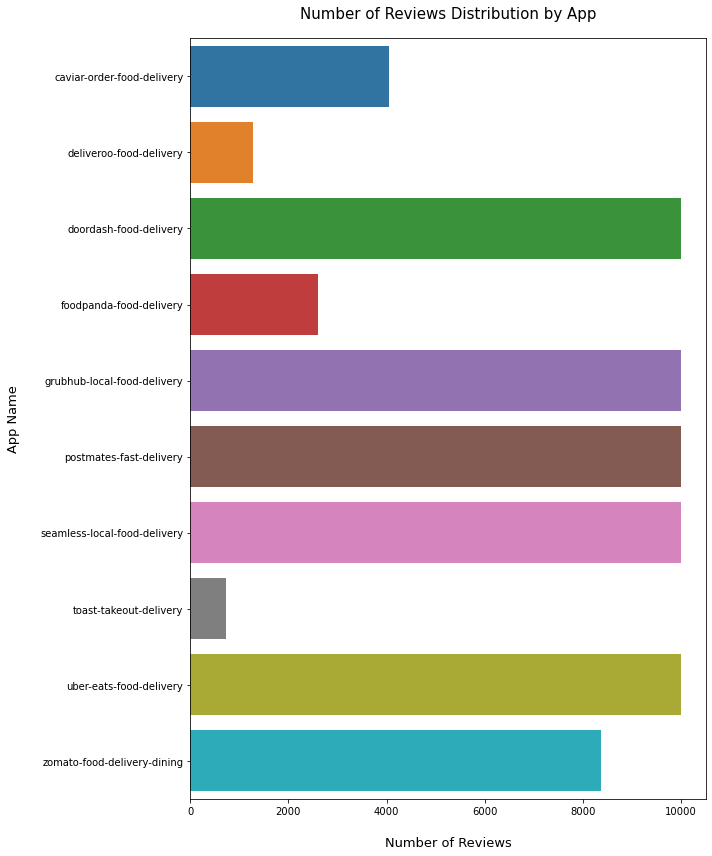

In [20]:
# Plot distribution of review count by app name
fig, ax = plt.subplots(figsize=(10,12))

sns.countplot(data=df, y='app_name', ax=ax)

plt.title('Number of Reviews Distribution by App', size = 15, pad = 20) 
plt.xlabel('Number of Reviews', size = 13, labelpad = 20)
plt.ylabel('App Name', size = 13, labelpad = 20)

plt.tight_layout()

### 2. Average Rating by App 

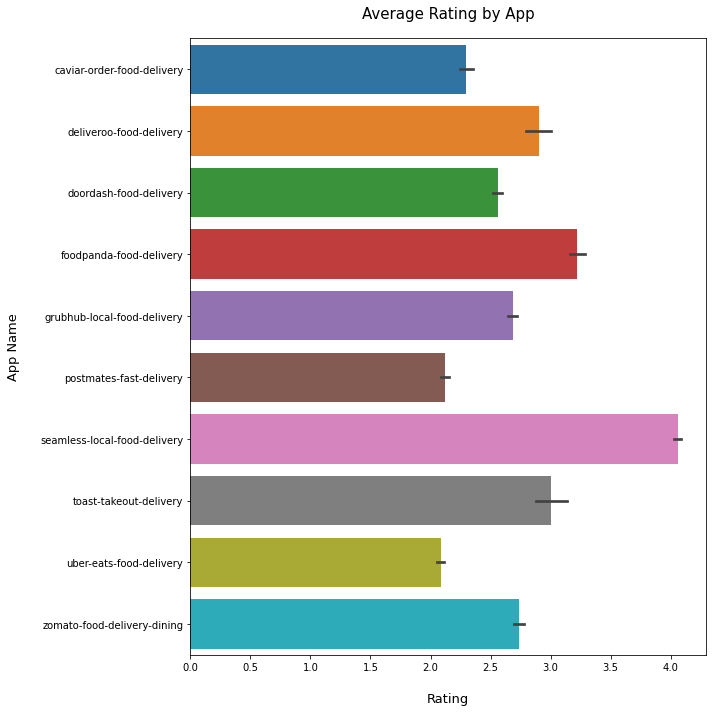

In [21]:
# Plot average rating by app 
fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(data=df, x='rating', y='app_name')

plt.title('Average Rating by App', size = 15, pad = 20) 
plt.xlabel('Rating', size = 13, labelpad = 20)
plt.ylabel('App Name', size = 13, labelpad = 20)

plt.tight_layout()

### 3. Rating Distribution of All Apps 

In [22]:
# Check distribution of ratings across all apps
df['rating'].value_counts()

1    31175
5    21524
2     5202
4     5052
3     4075
Name: rating, dtype: int64

In [23]:
# Check distribution of ratings across all apps in percentages
df['rating'].value_counts(normalize=True)

1    0.465104
5    0.321120
2    0.077609
4    0.075371
3    0.060795
Name: rating, dtype: float64

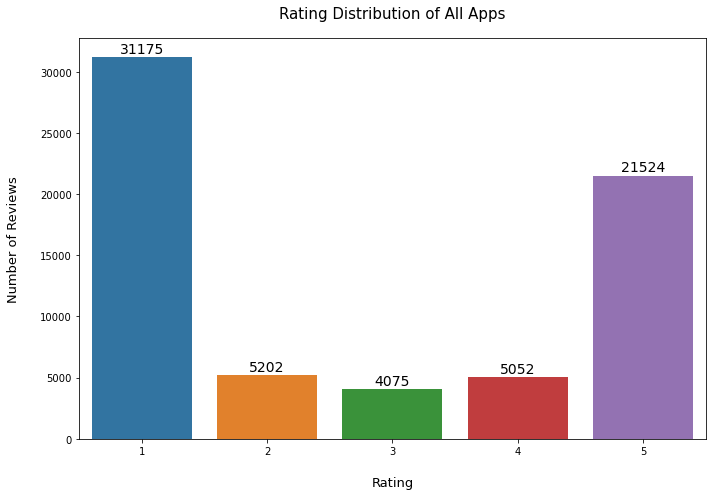

In [24]:
# Plot distribution of ratings across all apps
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='rating', data=df, ax=ax)

plt.title('Rating Distribution of All Apps', size = 15, pad = 20) 
plt.xlabel('Rating', size = 13, labelpad = 20)
plt.ylabel('Number of Reviews', size = 13, labelpad = 20)

# Show number of reviews for each bar
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2.,
                                          p.get_height()),ha='center',
                va='center', fontsize=14, color='black', xytext=(0, 8),
                textcoords='offset points')

fig.tight_layout();

### 4. Rating Distribution of Apps with Most Reviews (Top 5)

In [25]:
# Create dataframe with data for top five apps in terms of review count
distribution_df = df[df['app_name'].isin(['doordash-food-delivery', 'grubhub-local-food-delivery',
                                          'postmates-fast-delivery', 'seamless-local-food-delivery',
                                          'uber-eats-food-delivery'])]

# Calculate average mean rating across top five apps
distribution_df = distribution_df.groupby('app_name')['rating']\
                                 .value_counts(normalize=True).to_frame()

# Rename percentage column and app_name column
distribution_df.columns = ['percentage']

# Reset index, rename app column and display result
distribution_df.reset_index(inplace=True)
distribution_df.columns = ['App', 'rating', 'percentage']
distribution_df

,App,rating,percentage
0,doordash-food-delivery,1,0.470600
1,doordash-food-delivery,5,0.263600
2,doordash-food-delivery,2,0.100900
3,doordash-food-delivery,3,0.089800
4,doordash-food-delivery,4,0.075100
5,grubhub-local-food-delivery,1,0.452736
6,grubhub-local-food-delivery,5,0.302291
7,grubhub-local-food-delivery,2,0.093028
8,grubhub-local-food-delivery,4,0.080224
9,grubhub-local-food-delivery,3,0.071722


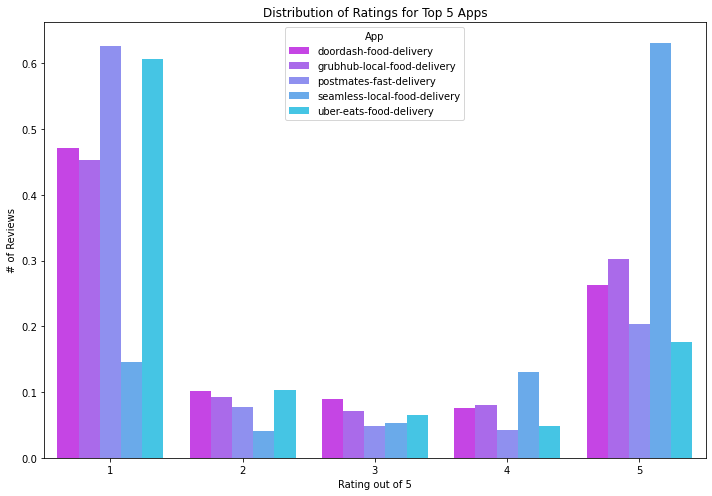

In [26]:
# Initialize figure
fig, ax = plt.subplots(figsize=(10,7))

# Create Barplot
sns.barplot(x='rating', y='percentage', hue='App', data=distribution_df, 
            ax=ax, palette='cool_r')

# Format barplot
ax.set_title('Distribution of Ratings for Top 5 Apps')
ax.set_ylabel('# of Reviews')
ax.set_xlabel('Rating out of 5')
fig.tight_layout();

Above plots show that many users are not quite satisfied using food delivery app in general as almost half of the users using the 5 most popular apps gave 1 for the rating. Users also seem to show extreme sentiments with their experience as 80% of the users gave either 1 or 5.  

Out of the top 5 apps with the most reviews, Seamless is the outstanding one as more than half of its users are gave 5 out of 5.

## Target Engineering
Here, we will create our target variables based on the ratings given by app users. First, we begin with a multi-class sentiment target and then move onto a version of a binary sentiment target where 4 stars and above are considered to be positive, as well as an alternative version where 3 stars and above are positive.

We can gather from the above plots that users are much more likely to leave positive 5-star ratings or negative 1-star ratings than ratings from 2-4 stars. We can also see that although there are some differences in distribution between apps, they generally follow a similar distribution of ratings with the exception of Seamless.

### Multi-class Sentiments

In [27]:
# Make multiclass sentiment column based on rating
# 4-5 are positive, 3 is neutral, 1-2 are negative
conditions = [df['rating'] >= 4,
              df['rating'] == 3,
              df['rating'] <= 2,]
values = [2, 1, 0]

df['multi_sent'] = np.select(conditions, values)

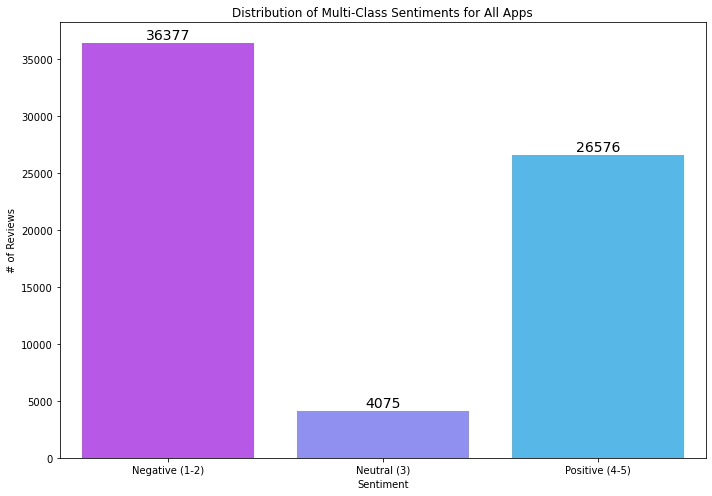

In [28]:
# Plot distribution of multiclass sentiments across all apps
fig, ax = plt.subplots(figsize=(10,7))

sns.countplot(x='multi_sent', data=df, ax=ax, palette='cool_r')

ax.set_title('Distribution of Multi-Class Sentiments for All Apps')
ax.set_ylabel('# of Reviews')
ax.set_xlabel('Sentiment')
ax.set_xticklabels(['Negative (1-2)','Neutral (3)', 'Positive (4-5)'])

for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2.,
                                          p.get_height()),ha='center',
                va='center', fontsize=14, color='black', xytext=(0, 8),
                textcoords='offset points')
fig.tight_layout();

### Binary Sentiments

In [29]:
# Make binary sentiment column based on ratings
# 3 and above are positive, below 3 is negative
conditions = [df['rating'] >= 3,
              df['rating'] < 3]

values = [1,0]

df['sent_bin_3up'] = np.select(conditions, values)

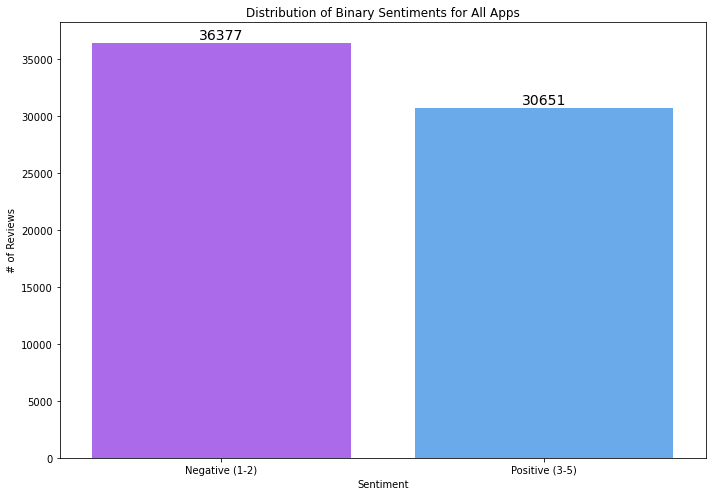

In [30]:
# Plot distribution of binary sentiments across all apps
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='sent_bin_3up', data=df, ax=ax, palette='cool_r')
ax.set_title('Distribution of Binary Sentiments for All Apps')
ax.set_ylabel('# of Reviews')
ax.set_xlabel('Sentiment')
ax.set_xticklabels(['Negative (1-2)', 'Positive (3-5)'])

for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2.,
                                          p.get_height()),ha='center',
                va='center', fontsize=14, color='black', xytext=(0, 8),
                textcoords='offset points')
fig.tight_layout();

In [31]:
# Make another binary sentiment column 
# 4 and above are positive, below 4 is negative
conditions = [
    df['rating'] >= 4,
    df['rating'] < 4,
]

values = [1,0]

df['sent_bin_4up'] = np.select(conditions, values)

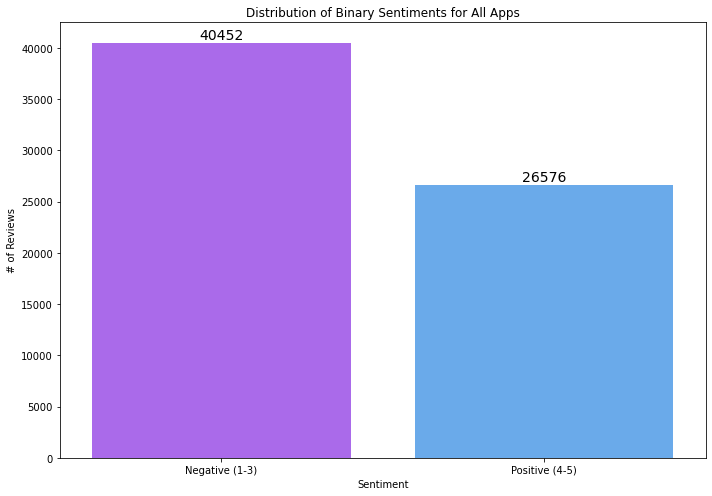

In [32]:
# Plot distribution of binary sentiments across all apps
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='sent_bin_4up', data=df, ax=ax, palette='cool_r')
ax.set_title('Distribution of Binary Sentiments for All Apps')
ax.set_ylabel('# of Reviews')
ax.set_xlabel('Sentiment')
ax.set_xticklabels(['Negative (1-3)', 'Positive (4-5)'])

for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2.,
                                          p.get_height()),ha='center',
                va='center', fontsize=14, color='black', xytext=(0, 8),
                textcoords='offset points')
fig.tight_layout();

In [33]:
# Prepare final table with relevant columns
final_df = df[['date', 'userName', 'combined_text', 'rating', 'multi_sent', 
               'sent_bin_3up', 'sent_bin_4up']]
final_df

,date,userName,combined_text,rating,multi_sent,sent_bin_3up,sent_bin_4up
0,9/17/20 17:12,Good64774,"Mixed feelings. Caviar used to be a great app. Top quality restaurants, working app, good service. But they recently merged with DoorDash which I have found to be a notoriously worse app. Since the merger, the app seemed to change and your delivery drivers are now from “Dashers”. When you order now and have an issue and try to chat Caviar sometimes their servers are down or you can’t get a hold of them. Your left to call the restaurant who may tell you your food has been ready for a half hour but DoorDash/Caviar hasn’t picked it up and is unreachable right now. Typical DoorDash problems. Although the app needs work and the DoorDash merger is disappointing. When I finally have been able to reach the company and explain various issues. Caviar does issue refunds and credits. This is a positive that some apps like UberEats or Postmates rarely provide. Caviar’s credits/refunds are close to the high level of Seamless/Grubhub. Only reason Seamless/Grubhub are better in this area is refunds and credits can be issued automatically in the app with ease if you run into issues. Caviar, as mentioned above can be difficult to reach and requires more explanation. Ultimately if the Caviar app improves the accessibility of their customer service and they continue to provide credits, I would consider changing my review back to 5 stars. On the other hand, if I keep running into these app issues or if they stop providing credits and refunds for issues I would lower the rating. I’m on the fence.",5,2,1,1
1,5/20/20 18:18,weterpest,"Unreliable, Unhelpful. They have such a great selection of restaurants but service is SO unreliable! I have ordered maybe 5 times through them and the last three have all been really frustrating. The last time I kept calling saying that the driver’s location on the map was not updating and the estimated delivery time kept getting pushed back. The customer service people would just read the estimated delivery time and disconnect the chat without ever reaching out to the driver. Two and a half hours after my food had been picked up and still not delivered, I finally figured out that the driver had car issues and the order was cancelled (3+ hours after being placed). This same type of situation has happened two times other times with the driver having car issues after picking up my order and getting here super late with food that has been sitting out in a car for at least an hour after being picked up, and customer service just doesn’t really do anything to figure it out or get a replacement order sent. I get that car issues happen, but three times in a row with this app isn’t a great track record considering that this has NEVER happened with competitor apps. I was really excited when I found Caviar because of the really great selection of restaurants, but I ended up deleting my account after this last time.",2,0,0,0
2,11/4/20 0:18,Mighty Power,"Deliveries take too long. Well for the last six months understanding pandemic aside because Uber and seamless are doing the same and they are not as late as they are and you are able to reach them, they apologize and always find the best solution or at least give you a credit to make it worthwhile. Caviar support team is easy on saying goodbyes, take a long time and then get back to you with no answer or problem fix, so for the last 10 or so orders all close by restaurants from my house, I waited about an hour to find out the driver was lost and was calling me in Spanish or the driver never showed up, and mostly I had to basically cancel the order and re-order again, I am finding out that the only way to get an order is to first order and then contact Support to make sure they are reaching out to somebody to get your food picked up, I can’t be using an app as such and always waiting around an hour and sometimes get my food cold because it’s been out there so long or never get it and r

## Tokenization

In [34]:
# Create a single corpus out of all combined text
corpus = final_df['combined_text'].to_list()

# Convert Corpus to Tokens
tokens = regexp_tokenize(','.join(corpus), r"([a-zA-Z]+(?:’[a-z]+)?)")

# Preview tokens
tokens[:20]

['Mixed',
 'feelings',
 'Caviar',
 'used',
 'to',
 'be',
 'a',
 'great',
 'app',
 'Top',
 'quality',
 'restaurants',
 'working',
 'app',
 'good',
 'service',
 'But',
 'they',
 'recently',
 'merged']

In [35]:
# Check number of unique tokens
len(set(tokens))

41300

## Lemmatization

In [36]:
# Lemmatizing function for list of tokens
def lemmatize_tokens(tokens_list):
    """
    Lemmatizes list of string tokens and returns list of lemmatized
    string tokens.

    Args:
        tokens_list (list) : List of string tokens to be lemmatized.

    Returns:
        tokens_lemm (list) : List of lemmatized string tokens
    """
    
    lemmatizer = WordNetLemmatizer()
    tokens_lemm = [lemmatizer.lemmatize(word) for word in tokens_list]
    return tokens_lemm

In [37]:
# Lemmatize tokens
nltk.download('wordnet')
lemmatized_tokens = lemmatize_tokens(tokens)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jenniferha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [38]:
# Check number of unique tokens after lemmatization
len(set(lemmatized_tokens))

38515

Our lemmatization function has reduced the number of unique tokens by a little less than 2800 words.

## Stopword Removal
In this section, we will remove any stopwords that do not add much value or prevent us from extracting words that have more value to the meaning of the document.



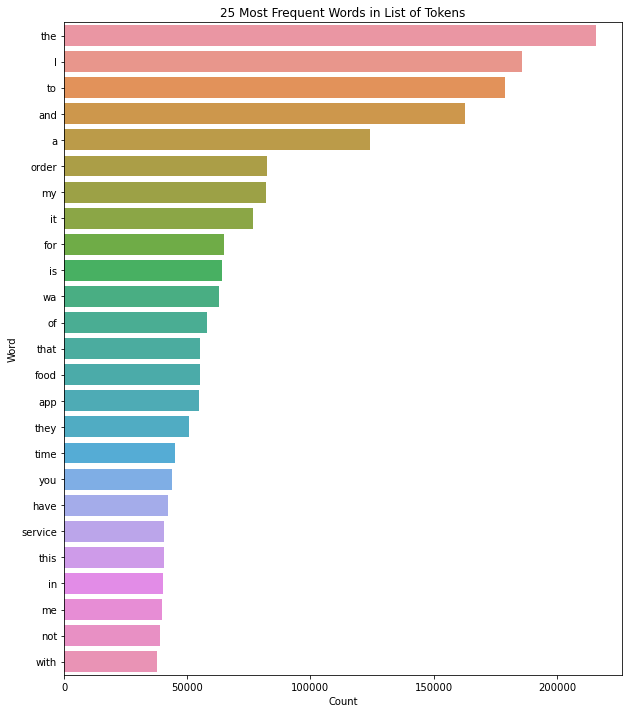

In [39]:
# Write function to create barplot of most common words
def most_freq(tokens, n=25, figsize=(12,7)):
    """
    Displays bar plot of n most frequent words in a list of tokens.

    Args:
        tokens (list) : List of string tokens to plot frequency for.
        n (int) : Number of tokens to plot.
        figsize (float, float) : Width, height in inches.

    Returns:
        
    """
    # Get frequency distribution of list of tokens
    freq = FreqDist(tokens)
    
    # Convert to DataFrame
    most_frequent_tokens = pd.DataFrame(freq.most_common(n),
                           columns=['word','count']).sort_values('count', 
                                                                 ascending=False)

    # Plot frequency distribution
    fig, ax = plt.subplots(figsize=(10,12))
    
    sns.barplot(data=most_frequent_tokens, y='word', x='count', 
                ax=ax, orient='h')

    ax.set_title(f'{n} Most Frequent Words in List of Tokens')
    ax.set_ylabel('Word')
    ax.set_xlabel('Count')
    
    
# Display frequency distirbution of lemmatized tokens
most_freq(lemmatized_tokens)

In [40]:
# Get all the stop words in the English language and preview first 25
nltk.download('stopwords')
stopwords_list = stopwords.words('english')
stopwords_list[:25]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jenniferha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers']

In [41]:
# Add punctuation to stopwords_list
stopwords_list.extend(string.punctuation)
stopwords_list[-10:]

['[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']

In [42]:
# Add additional punctuation below to stopwords_list
stopwords_list.extend(['“','”','...','’',"'",'``'])

In [43]:
# Remove stopwords from list of tokens
stopped_tokens = [w.lower() for w in lemmatized_tokens  if w.lower() \
                  not in stopwords_list]
stopped_tokens[:50]

['mixed',
 'feeling',
 'caviar',
 'used',
 'great',
 'app',
 'top',
 'quality',
 'restaurant',
 'working',
 'app',
 'good',
 'service',
 'recently',
 'merged',
 'doordash',
 'found',
 'notoriously',
 'worse',
 'app',
 'since',
 'merger',
 'app',
 'seemed',
 'change',
 'delivery',
 'driver',
 'dashers',
 'order',
 'issue',
 'try',
 'chat',
 'caviar',
 'sometimes',
 'server',
 'can’t',
 'get',
 'hold',
 'left',
 'call',
 'restaurant',
 'may',
 'tell',
 'food',
 'ha',
 'ready',
 'half',
 'hour',
 'doordash',
 'caviar']

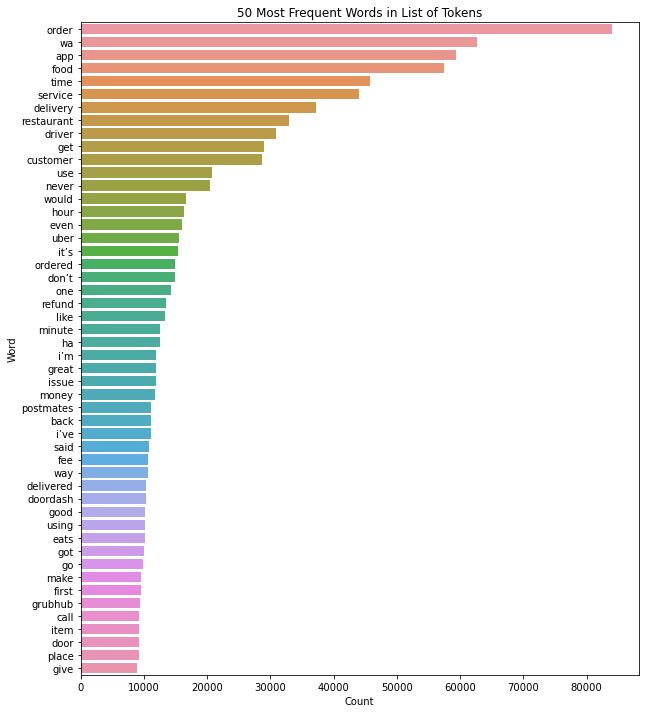

In [44]:
# Display frequency distirbution of lemmatized tokens after removing stopwords
most_freq(stopped_tokens, 50, figsize=(12,40))

After removing some common stopwords, we will continue to remove some words that provide no value towards users' sentiments, as well as any app names that we are reviewing for this analysis. 

In [45]:
# Add common words unrelated to sentiment to stopwords_list
stopwords_list.extend(['wa','app', 'would', 'even', 'uber', 'it’s', 'don’t',
                       'ha', 'i’m', 'postmates', 'i’ve', 'said', 'doordash', 'eats', 'grubhub', 'caviar', 'urbanspoon',
                      'spoon', 'urban', 'urban spoon', 'yelp', 'zomato'])

In [46]:
# Remove new stopwords
stopped_tokens = [w.lower() for w in lemmatized_tokens  if w.lower() \
                  not in stopwords_list]
stopped_tokens[:50]

['mixed',
 'feeling',
 'used',
 'great',
 'top',
 'quality',
 'restaurant',
 'working',
 'good',
 'service',
 'recently',
 'merged',
 'found',
 'notoriously',
 'worse',
 'since',
 'merger',
 'seemed',
 'change',
 'delivery',
 'driver',
 'dashers',
 'order',
 'issue',
 'try',
 'chat',
 'sometimes',
 'server',
 'can’t',
 'get',
 'hold',
 'left',
 'call',
 'restaurant',
 'may',
 'tell',
 'food',
 'ready',
 'half',
 'hour',
 'hasn’t',
 'picked',
 'unreachable',
 'right',
 'typical',
 'problem',
 'although',
 'need',
 'work',
 'merger']

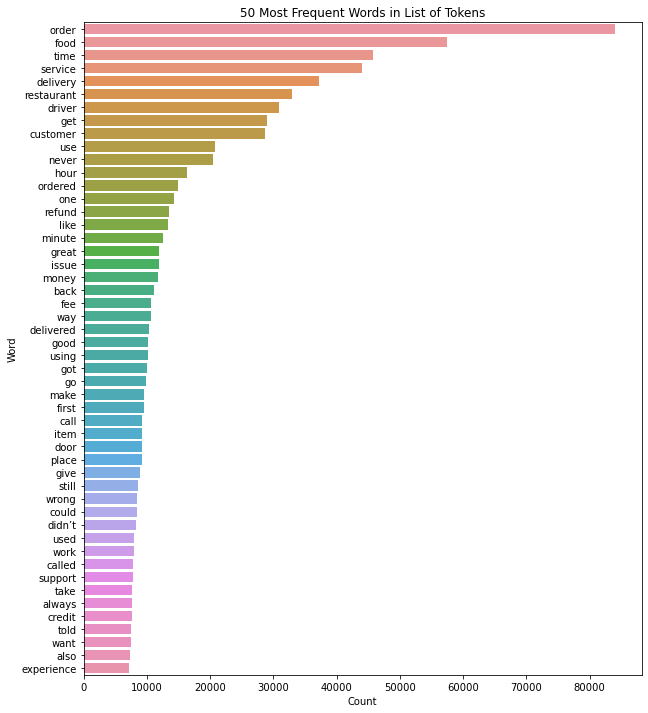

In [47]:
# Display list of tokens after removing extended stopwords
most_freq(stopped_tokens, 50, figsize=(12,25))

Additionally, we want to remove words that are too indicative of a user's sentiment. By doing so, we will be able to better examine what elements of the apps users considered to be negative or positive without obvious indicator words. Note that some words were added after running the models and coefficient analysis to get a better final result. 

In [48]:
# Add obvious indicator words to stopwords list
stopwords_list.extend(['never', 'terrible', 'like', 'great', 'issue', 'postmates', 'good', 
                       'first', 'still', 'wrong', 'could', 'can’t', 'didn’t', 'has’t', 'don’t',
                       'door', 'dash', 'grub', 'hub','seamless', 'hate', 'worthless', 'awful', 'worse', 'horrible',
                       'poor', 'bad', 'useless', 'worst', 'love', 'amazing', 'best', 'excellent','perfect', 'awesome',
                       'nice', 'fantastic', 'happy', 'nyc', 'sometimes', 'thank', 'appreciate', 'friendly', 'pathetic',
                       'shame','unreliable', 'unprofessional', 'inaccurate', 'disappointing', 'code', 'delete', 
                       'unusable', 'deleting', 'deleted'])

In [49]:
# Remove stopwords
stopped_tokens = [w.lower() for w in lemmatized_tokens  if w.lower() \
                  not in stopwords_list]

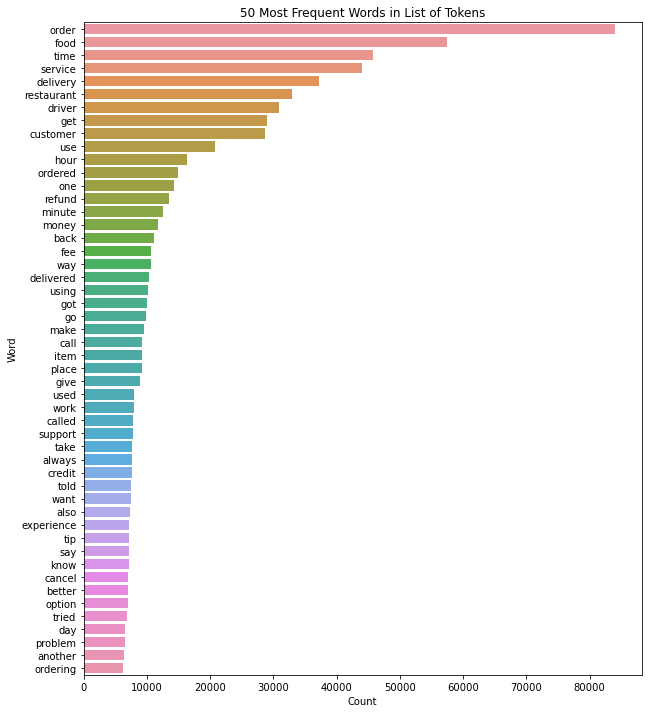

In [50]:
# Display frequency distribution of clean list of tokens
most_freq(stopped_tokens,50, figsize=(12,25))

## Brigram Exploration
Here, we will examine whether combinations of words give us more insight into sentiment than single words.

In [51]:
# Get bigrams and frequencies from list of stopped tokens
bigram_measures = nltk.collocations.BigramAssocMeasures()
bigram_finder = nltk.BigramCollocationFinder.from_words(stopped_tokens)
bigram_scores = bigram_finder.score_ngrams(bigram_measures.raw_freq)

In [52]:
# Make a DataFrame from the bigram frequencies
pd.DataFrame(bigram_scores, columns=["Word","Freq"]).head(20)

,Word,Freq
0,"(customer, service)",0.007701
1,"(food, delivery)",0.001666
2,"(delivery, service)",0.001592
3,"(cancel, order)",0.001517
4,"(delivery, fee)",0.001453
5,"(get, food)",0.001434
6,"(delivery, time)",0.001372
7,"(order, food)",0.001296
8,"(placed, order)",0.001278
9,"(ordered, food)",0.001109


The result clearly shows that there are some common topics mentioned in the reviews: order (time, accuracy), customer service, and delivery fee. 

Let's visualize this as a wordcloud below.

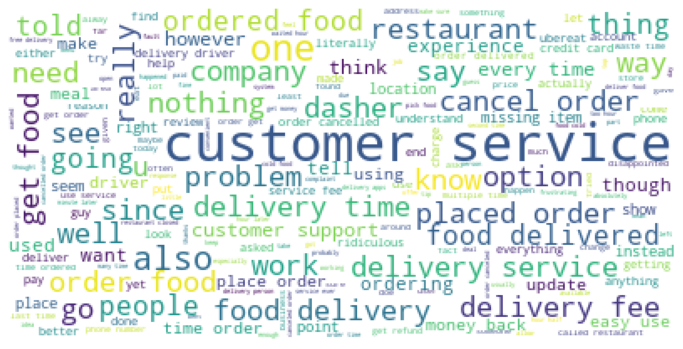

In [56]:
# Create a WordCloud with our stopwords_list and bigrams
wordcloud = WordCloud(stopwords=stopwords_list,collocations=True, background_color="White")

# Generate wordcloud from stopped_tokens
wordcloud.generate(','.join(stopped_tokens))

# Plot with matplotlib
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off');

## Modeling- Multi-Class:  Negative (1-2), Neutral (3), Positive (4-5)
During this phase, we will explore some different modeling algorithms to help us extract more accurate insights into what words are more influential in classifying sentiments.

We will explore Logistic Regression and Random Forest models for multi-class sentiments,and add Support Vector Classification for binary sentiments. Then we will implement gridsearch for each classification and run a final model with the best parameters to optimize model performance and address the issue of under or overfitting to the training data.

Since we saw that bigrams can reveal additional insight, we will also set our ngram_range to (1,2) to include vectorization of individual words as well as bigrams.

### Pre-processing: Train-Test Split

In [54]:
# Make X and y
y_multi = final_df['multi_sent'].copy()
X = final_df['combined_text'].copy()

# Train Test Split
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(X, y_multi, 
                                                                            test_size=0.3, 
                                                                            random_state=27)

# Check y_train value counts
y_multi_train.value_counts(normalize=True)

0    0.542659
2    0.396385
1    0.060956
Name: multi_sent, dtype: float64

In [55]:
# Initialize RegExp tokenizer
tokenizer = RegexpTokenizer(r"([a-zA-Z]+(?:’[a-z]+)?)")

# Make a TF-IDF vectorizer
vectorizer_multi = TfidfVectorizer(tokenizer=tokenizer.tokenize,
                                   token_pattern=r"([a-zA-Z]+(?:’[a-z]+)?)",
                                   stop_words=stopwords_list,
                                   ngram_range=(1,2))

# Vectorize data and make X_train_tfidf and X_test_tfidf
X_multi_train_tfidf = vectorizer_multi.fit_transform(X_multi_train)
X_multi_test_tfidf = vectorizer_multi.transform(X_multi_test)
X_multi_train_tfidf;

### Model 1: Logistic Regression

In [83]:
# Fit Logistic Regression model on multi-class training data
multi_logreg = LogisticRegression(max_iter=400, solver='lbfgs', class_weight='balanced')
multi_logreg.fit(X_multi_train_tfidf, y_multi_train);

****TRAIN VS TEST ACCURACY****

 Training Score: 0.9 
 Test Score: 0.76 

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0       0.81      0.85      0.83     10916
           1       0.23      0.34      0.27      1215
           2       0.82      0.71      0.76      7978

    accuracy                           0.76     20109
   macro avg       0.62      0.63      0.62     20109
weighted avg       0.78      0.76      0.77     20109

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


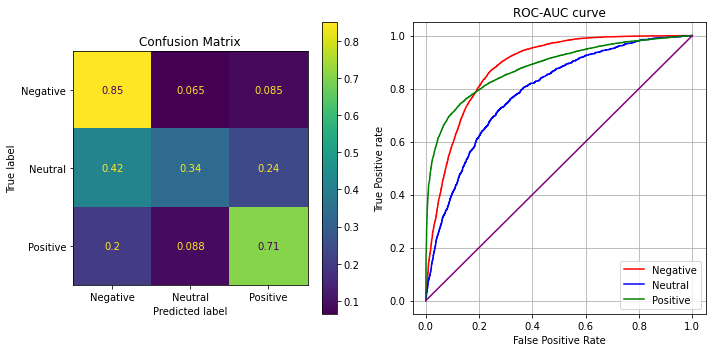

In [84]:
# Evaluate model performance
evaluate_model(y_multi_test, y_multi_train, 
               X_multi_test_tfidf, X_multi_train_tfidf, multi_logreg)

### Model 2: Random Forest

In [85]:
# Fit Random Forest model on multi-class training data
multi_rf = RandomForestClassifier(random_state=42,class_weight='balanced')
multi_rf.fit(X_multi_train_tfidf, y_multi_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

****TRAIN VS TEST ACCURACY****

 Training Score: 1.0 
 Test Score: 0.77 

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0       0.76      0.88      0.82     10916
           1       0.50      0.00      0.00      1215
           2       0.77      0.73      0.75      7978

    accuracy                           0.77     20109
   macro avg       0.68      0.54      0.52     20109
weighted avg       0.75      0.77      0.74     20109

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


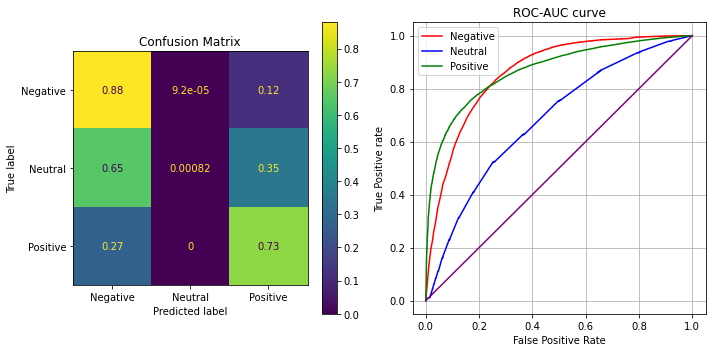

In [86]:
# Evaluate model performance
evaluate_model(y_multi_test, y_multi_train, X_multi_test_tfidf, 
               X_multi_train_tfidf, multi_rf)

## Grid Search

In [87]:
# Code borrowed and modified from https://medium.com/analytics-vidhya/ml-pipelines-using-scikit-learn-and-gridsearchcv-fe605a7f9e05
# Code borrowed from https://medium.com/swlh/the-hyperparameter-cheat-sheet-770f1fed32ff

# Set grid search params
param_range_fl = [1.0, 0.5]

grid_params_lr = [{'penalty': ['l2'],
                   'C': param_range_fl,
                   'max_iter': [300 , 400, 500],
                   'solver': ['lbfgs']}]

grid_params_rf = {'criterion': ['gini', 'entropy'],
              'max_depth': [10, 20, 40],
              'n_estimators': [50, 100, 200],
              'min_samples_leaf': [2, 5, 10]}


# Construct grid searches
jobs = -1

LR = GridSearchCV(estimator=multi_logreg,
            param_grid=grid_params_lr,
            scoring='f1_macro',
            cv=5) 

RF = GridSearchCV(estimator=multi_rf,
            param_grid=grid_params_rf,
            scoring='f1_macro',
            cv=5)


# List of pipelines for iterating through each of them
grids = [LR, RF]

# Creating a dict for our reference
grid_dict = {0: 'Logistic Regression', 
             1: ' Random Forest'}

# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    gs.fit(X_bin_train_tfidf, y_bin_train)
    print('Best params are : %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_bin_test_tfidf)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_bin_test, y_pred))
    # Track best (highest test accuracy) model
    if accuracy_score(y_bin_test, y_pred) > best_acc:
        best_acc = accuracy_score(y_bin_test, y_pred)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: Logistic Regression
Best params are : {'C': 1.0, 'max_iter': 300, 'penalty': 'l2', 'solver': 'lbfgs'}
Best training accuracy: 0.806
Test set accuracy score for best params: 0.828 

Estimator:  Random Forest
Best params are : {'criterion': 'gini', 'max_depth': 40, 'min_samples_leaf': 2, 'n_estimators': 200}
Best training accuracy: 0.751
Test set accuracy score for best params: 0.758 

Classifier with best test set accuracy: Logistic Regression


In [88]:
# Fit Logistic Regression model on multi-class training data with best parameters
multi_logreg_grid = LogisticRegression(C=1.0, max_iter=300, penalty='l2', solver='lbfgs')
multi_logreg_grid.fit(X_multi_train_tfidf, y_multi_train);

****TRAIN VS TEST ACCURACY****

 Training Score: 0.87 
 Test Score: 0.79 

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0       0.78      0.92      0.84     10916
           1       0.34      0.02      0.04      1215
           2       0.83      0.73      0.78      7978

    accuracy                           0.79     20109
   macro avg       0.65      0.56      0.55     20109
weighted avg       0.77      0.79      0.77     20109

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


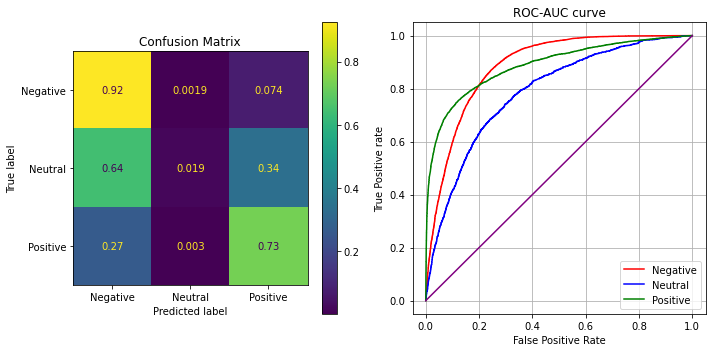

In [89]:
# Evaluate model performance
evaluate_model(y_multi_test, y_multi_train, 
               X_multi_test_tfidf, X_multi_train_tfidf, multi_logreg_grid)

In [90]:
# Fit Logistic Regression model on multi-class training data with best parameters and class_weight parameter
multi_logreg_grid_balanced = LogisticRegression(C=1.0, max_iter=300, penalty='l2', solver='lbfgs', class_weight='balanced')
multi_logreg_grid_balanced.fit(X_multi_train_tfidf, y_multi_train);

****TRAIN VS TEST ACCURACY****

 Training Score: 0.9 
 Test Score: 0.76 

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0       0.81      0.85      0.83     10916
           1       0.23      0.34      0.27      1215
           2       0.82      0.71      0.76      7978

    accuracy                           0.76     20109
   macro avg       0.62      0.63      0.62     20109
weighted avg       0.78      0.76      0.77     20109

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


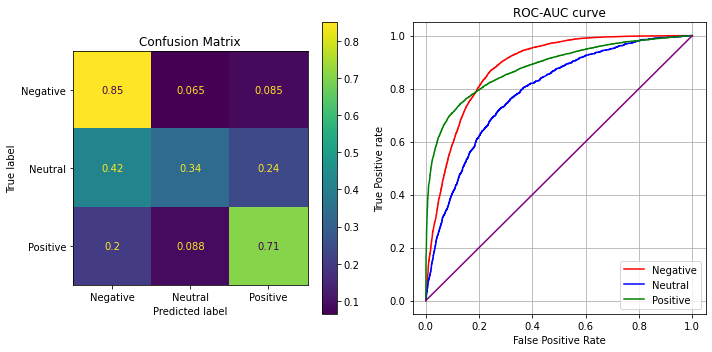

In [91]:
# Evaluate model performance
evaluate_model(y_multi_test, y_multi_train, 
               X_multi_test_tfidf, X_multi_train_tfidf, multi_logreg_grid_balanced)

For multi-class classification, Logistic Regression model clearly outperformed the Random Forest model. Interestingly, our Logistic Regression model with the best parameters from the GridSearch didn't perform as expected - it greatly sacrificed the F1 score on the neutral sentiment to improve the over-fitting issue slighly. Even more, the model with the best parameters returned the same result from our first iteration when `class_weight='balanced'` parameter was added.

## Modeling -  Binary: Negative (1-3), Positive (4-5)

### Pre-processing: Train-Test Split

In [57]:
# Make y
y_bin = final_df['sent_bin_4up'].copy()

## Train Test Split
X_bin_train, X_bin_test, y_bin_train, y_bin_test = train_test_split(X, y_bin, 
                                                                    test_size=0.3, 
                                                                    random_state=27)

# Check y_train value counts
y_bin_train.value_counts(normalize=True)

0    0.603615
1    0.396385
Name: sent_bin_4up, dtype: float64

In [58]:
# Make a TF-IDF vectorizer using previously created tokenizer
vectorizer_bin = TfidfVectorizer(tokenizer=tokenizer.tokenize,
                                 token_pattern=r"([a-zA-Z]+(?:’[a-z]+)?)",
                                 stop_words=stopwords_list,
                                 ngram_range=(1,2))

# Vectorize data and make X_train_tfidf and X_test_tfidf
X_bin_train_tfidf = vectorizer_bin.fit_transform(X_bin_train)
X_bin_test_tfidf = vectorizer_bin.transform(X_bin_test)
X_bin_train_tfidf;

### Model 1: Logistic Regression

In [59]:
# Fit Logistic Regression model on binary training data
bin_logreg = LogisticRegression(solver='liblinear', class_weight='balanced')
bin_logreg.fit(X_bin_train_tfidf, y_bin_train);

****TRAIN VS TEST ACCURACY****

 Training Score: 0.89 
 Test Score: 0.83 

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0       0.84      0.89      0.86     12131
           1       0.81      0.74      0.77      7978

    accuracy                           0.83     20109
   macro avg       0.82      0.81      0.82     20109
weighted avg       0.83      0.83      0.83     20109

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


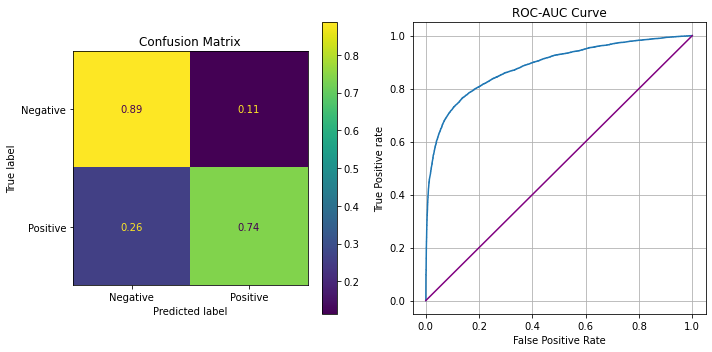

In [60]:
# Evaluate model performance
evaluate_model(y_bin_test, y_bin_train, 
               X_bin_test_tfidf, X_bin_train_tfidf, bin_logreg, 2)

### Model 2: Random Forest

In [61]:
# Fit Random Forest model on binary training data
bin_rf = RandomForestClassifier(class_weight='balanced')
bin_rf.fit(X_bin_train_tfidf, y_bin_train);

****TRAIN VS TEST ACCURACY****

 Training Score: 1.0 
 Test Score: 0.81 

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0       0.81      0.90      0.85     12131
           1       0.81      0.68      0.74      7978

    accuracy                           0.81     20109
   macro avg       0.81      0.79      0.80     20109
weighted avg       0.81      0.81      0.81     20109

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


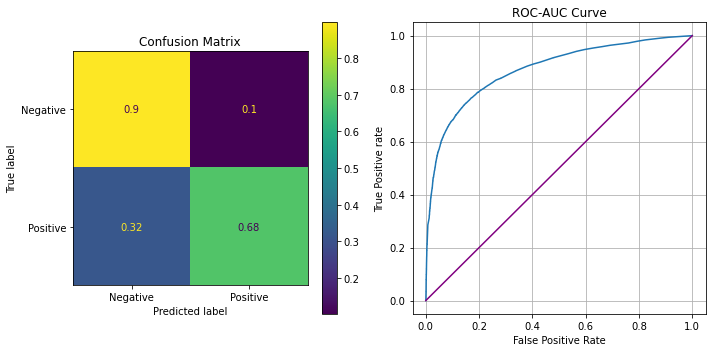

In [62]:
# Evaluate model performance
evaluate_model(y_bin_test, y_bin_train,
               X_bin_test_tfidf, X_bin_train_tfidf, bin_rf, 2)

### Model 3: Support Vector Classification (SVC)

In [63]:
# Fit SVC model on binary training data
bin_svc = LinearSVC(class_weight='balanced')
bin_svc.fit(X_bin_train_tfidf, y_bin_train);

****TRAIN VS TEST ACCURACY****

 Training Score: 1.0 
 Test Score: 0.83 

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0       0.83      0.90      0.87     12131
           1       0.83      0.72      0.77      7978

    accuracy                           0.83     20109
   macro avg       0.83      0.81      0.82     20109
weighted avg       0.83      0.83      0.83     20109

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


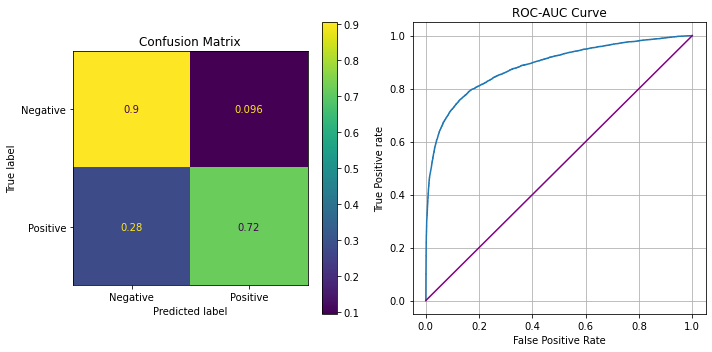

In [64]:
# Evaluate model performance
evaluate_model(y_bin_test, y_bin_train, 
               X_bin_test_tfidf, X_bin_train_tfidf, bin_svc, 2)

### GridSearch

In [65]:
# Code borrowed and modified from https://medium.com/analytics-vidhya/ml-pipelines-using-scikit-learn-and-gridsearchcv-fe605a7f9e05
# Code borrowed from https://medium.com/swlh/the-hyperparameter-cheat-sheet-770f1fed32ff

# Set grid search params
param_range_fl = [1.0, 0.5]

grid_params_lr = [{'penalty': ['l1', 'l2'],
        'C': param_range_fl,
        'solver': ['liblinear']}] 

grid_params_rf = {'criterion': ['gini', 'entropy'],
              'max_depth': [10, 20, 40],
              'n_estimators': [50, 100, 200],
              'min_samples_leaf': [2, 5, 10]}

grid_params_svc = [{'penalty': ['l1', 'l2'],
              'loss': ['hinge', 'squared_hinge'],
              'tol': [0.000001, 0.0001, 0.01],
              'C': [0.1, 1, 10], 
              'fit_intercept': [True, False]}]


# Construct grid searches
jobs = -1

LR = GridSearchCV(estimator=bin_logreg,
            param_grid=grid_params_lr,
            scoring='f1_macro',
            cv=5) 

RF = GridSearchCV(estimator=bin_rf,
            param_grid=grid_params_rf,
            scoring='f1_macro',
            cv=5, 
            n_jobs=jobs)

SVC = GridSearchCV(estimator=bin_svc,
            param_grid=grid_params_svc,
            scoring='f1_macro',
            cv=5, 
            n_jobs=jobs)

# List of pipelines for iterating through each of them
grids = [LR, RF, SVC]

# Creating a dict for our reference
grid_dict = {0: 'Logistic Regression', 
             1: 'Random Forest',
             2: 'Support Vector Classification'}

# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    gs.fit(X_bin_train_tfidf, y_bin_train)
    print('Best params are : %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_bin_test_tfidf)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_bin_test, y_pred))
    # Track best (highest test accuracy) model
    if accuracy_score(y_bin_test, y_pred) > best_acc:
        best_acc = accuracy_score(y_bin_test, y_pred)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: Logistic Regression
Best params are : {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
Best training accuracy: 0.806
Test set accuracy score for best params: 0.828 

Estimator: Random Forest
Best params are : {'criterion': 'entropy', 'max_depth': 40, 'min_samples_leaf': 2, 'n_estimators': 100}
Best training accuracy: 0.750
Test set accuracy score for best params: 0.758 

Estimator: Support Vector Classification
Best params are : {'C': 1, 'fit_intercept': True, 'loss': 'hinge', 'penalty': 'l2', 'tol': 1e-06}
Best training accuracy: 0.816
Test set accuracy score for best params: 0.835 

Classifier with best test set accuracy: Support Vector Classification


In [66]:
# Fit SVC model on binary training data with the best parameters
bin_svc_grid = LinearSVC(C=1.0, fit_intercept=True, loss='hinge', penalty='l2', tol=0.000001)
bin_svc_grid.fit(X_bin_train_tfidf, y_bin_train);

/Users/jenniferha/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


****TRAIN VS TEST ACCURACY****

 Training Score: 0.95 
 Test Score: 0.84 

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0       0.82      0.93      0.87     12131
           1       0.87      0.70      0.77      7978

    accuracy                           0.84     20109
   macro avg       0.85      0.81      0.82     20109
weighted avg       0.84      0.84      0.83     20109

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


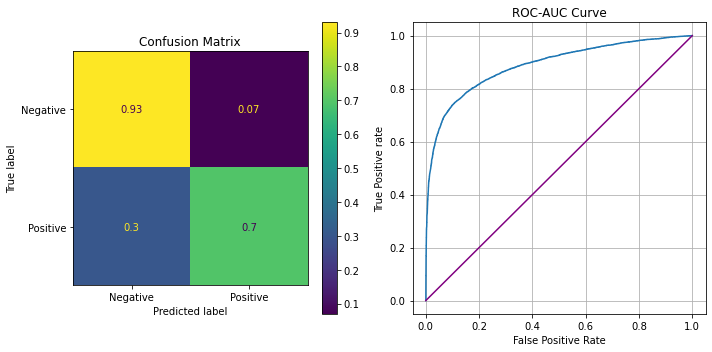

In [67]:
# Evaluate model performance
evaluate_model(y_bin_test, y_bin_train, 
               X_bin_test_tfidf, X_bin_train_tfidf, bin_svc_grid, 2)

In [68]:
# Fit SVC model on binary training data with best parameters and class_weight parameter
bin_svc_grid = LinearSVC(C=1.0, fit_intercept=True, loss='hinge', penalty='l2', tol=0.000001, class_weight='balanced')
bin_svc_grid.fit(X_bin_train_tfidf, y_bin_train);

****TRAIN VS TEST ACCURACY****

 Training Score: 0.96 
 Test Score: 0.84 

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0       0.83      0.91      0.87     12131
           1       0.84      0.72      0.78      7978

    accuracy                           0.84     20109
   macro avg       0.84      0.82      0.82     20109
weighted avg       0.84      0.84      0.83     20109

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


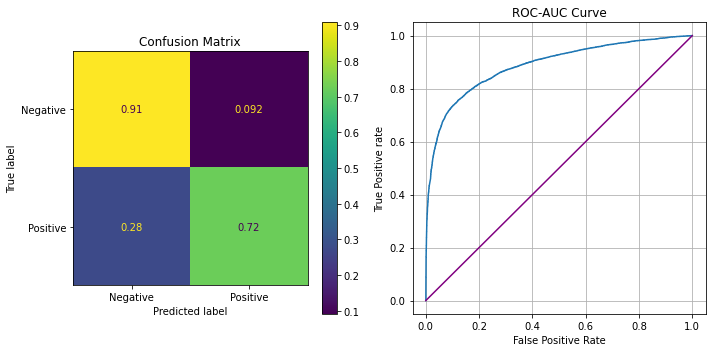

In [69]:
# Evaluate model performance
evaluate_model(y_bin_test, y_bin_train, 
               X_bin_test_tfidf, X_bin_train_tfidf, bin_svc_grid, 2)

For this binary classification modeling, the GridSearch result showed that SVC model is the best performing classifier. However, the F1 score results of the SVC models using best parameters and the `class_weight='balanced` parameter was very similar to that of Logistic Regression model. Moreover, the Logistic Regression model performed the best in terms of addressing the over-fitting issue.

## Modeling - Binary: Negative (1-2), Positive (3-5)

### Pre-processing: Train-Test Split

In [70]:
# Make y
y_bin2 = final_df['sent_bin_3up'].copy()

## Train Test Split
X_bin_train2, X_bin_test2, y_bin_train2, y_bin_test2 = train_test_split(X, y_bin2, 
                                                                    test_size=0.3, 
                                                                    random_state=27)

# Check y_train value counts
y_bin_train2.value_counts(normalize=True)

0    0.542659
1    0.457341
Name: sent_bin_3up, dtype: float64

In [71]:
# Make a TF-IDF vectorizer using previously created tokenizer
vectorizer_bin = TfidfVectorizer(tokenizer=tokenizer.tokenize,
                                 token_pattern=r"([a-zA-Z]+(?:’[a-z]+)?)",
                                 stop_words=stopwords_list,
                                 ngram_range=(1,2))

# Vectorize data and make X_train_tfidf and X_test_tfidf
X_bin_train_tfidf2 = vectorizer_bin.fit_transform(X_bin_train2)
X_bin_test_tfidf2 = vectorizer_bin.transform(X_bin_test2)
X_bin_train_tfidf2;

### Model 1: Logistic Regression

In [72]:
# Fit Logistic Regression model on binary training data
bin_logreg2 = LogisticRegression(solver='liblinear', class_weight='balanced')
bin_logreg2.fit(X_bin_train_tfidf2, y_bin_train2);

****TRAIN VS TEST ACCURACY****

 Training Score: 0.88 
 Test Score: 0.82 

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0       0.80      0.88      0.84     10916
           1       0.83      0.74      0.79      9193

    accuracy                           0.82     20109
   macro avg       0.82      0.81      0.81     20109
weighted avg       0.82      0.82      0.81     20109

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


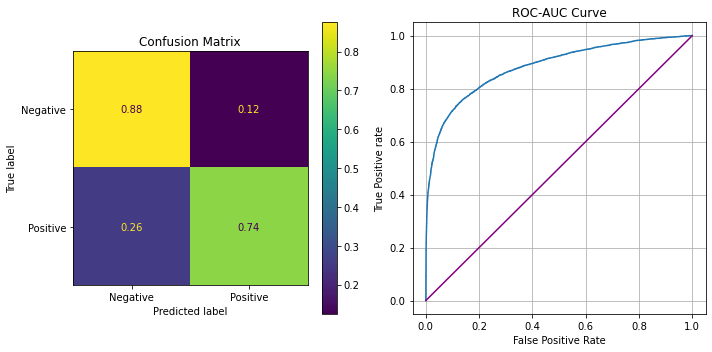

In [73]:
# Evaluate model performance
evaluate_model(y_bin_test2, y_bin_train2, 
               X_bin_test_tfidf2, X_bin_train_tfidf2, bin_logreg2, 2)

### Model 2: Random Forest

In [74]:
# Fit Random Forest model on binary training data
bin_rf2 = RandomForestClassifier(class_weight='balanced')
bin_rf2.fit(X_bin_train_tfidf2, y_bin_train2);

****TRAIN VS TEST ACCURACY****

 Training Score: 1.0 
 Test Score: 0.8 

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0       0.78      0.86      0.82     10916
           1       0.82      0.72      0.76      9193

    accuracy                           0.80     20109
   macro avg       0.80      0.79      0.79     20109
weighted avg       0.80      0.80      0.80     20109

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


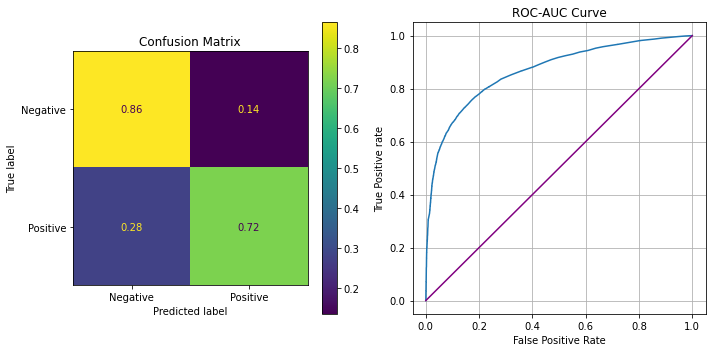

In [75]:
# Evaluate model performance
evaluate_model(y_bin_test2, y_bin_train2,
               X_bin_test_tfidf2, X_bin_train_tfidf2, bin_rf2, 2)

### Model 3: Support Vector Classification (SVC)

In [76]:
# Fit SVC model on binary training data
bin_svc2 = LinearSVC(class_weight='balanced')
bin_svc2.fit(X_bin_train_tfidf2, y_bin_train2);

****TRAIN VS TEST ACCURACY****

 Training Score: 1.0 
 Test Score: 0.82 

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0       0.80      0.89      0.84     10916
           1       0.84      0.74      0.79      9193

    accuracy                           0.82     20109
   macro avg       0.82      0.81      0.81     20109
weighted avg       0.82      0.82      0.82     20109

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


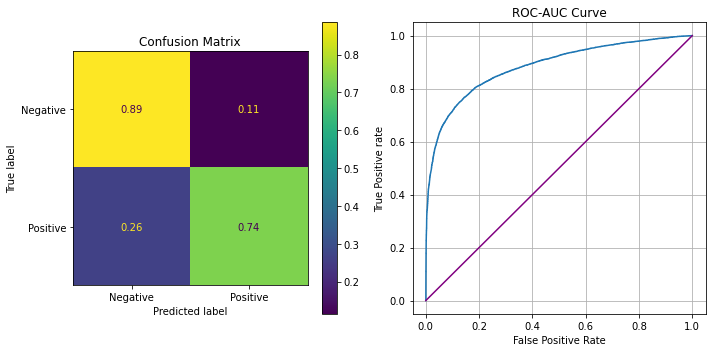

In [77]:
# Evaluate model performance
evaluate_model(y_bin_test2, y_bin_train2, 
               X_bin_test_tfidf2, X_bin_train_tfidf2, bin_svc2, 2)

### GridSearch

In [78]:
# Code borrowed and modified from https://medium.com/analytics-vidhya/ml-pipelines-using-scikit-learn-and-gridsearchcv-fe605a7f9e05
# Code borrowed from https://medium.com/swlh/the-hyperparameter-cheat-sheet-770f1fed32ff

# Set grid search params
param_range_fl = [1.0, 0.5]

grid_params_lr = [{'penalty': ['l1', 'l2'],
        'C': param_range_fl,
        'solver': ['liblinear']}] 

grid_params_rf = {'criterion': ['gini', 'entropy'],
              'max_depth': [10, 20, 40],
              'n_estimators': [50, 100, 200],
              'min_samples_leaf': [2, 5, 10]}

grid_params_svc = [{'penalty': ['l1', 'l2'],
              'loss': ['hinge', 'squared_hinge'],
              'tol': [0.000001, 0.0001, 0.01],
              'C': [0.1, 1, 10], 
              'fit_intercept': [True, False]}]


# Construct grid searches
jobs = -1

LR = GridSearchCV(estimator=bin_logreg2,
            param_grid=grid_params_lr,
            scoring='f1_macro',
            cv=5) 

RF = GridSearchCV(estimator=bin_rf2,
            param_grid=grid_params_rf,
            scoring='f1_macro',
            cv=5, 
            n_jobs=jobs)

SVC = GridSearchCV(estimator=bin_svc2,
            param_grid=grid_params_svc,
            scoring='f1_macro',
            cv=5, 
            n_jobs=jobs)

# List of pipelines for iterating through each of them
grids = [LR, RF, SVC]

# Creating a dict for our reference
grid_dict = {0: 'Logistic Regression', 
             1: 'Random Forest',
             2: 'Support Vector Classification'}

# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    gs.fit(X_bin_train_tfidf2, y_bin_train2)
    print('Best params are : %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_bin_test_tfidf2)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_bin_test2, y_pred))
    # Track best (highest test accuracy) model
    if accuracy_score(y_bin_test2, y_pred) > best_acc:
        best_acc = accuracy_score(y_bin_test2, y_pred)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: Logistic Regression
Best params are : {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
Best training accuracy: 0.806
Test set accuracy score for best params: 0.816 

Estimator: Random Forest
Best params are : {'criterion': 'entropy', 'max_depth': 40, 'min_samples_leaf': 2, 'n_estimators': 200}
Best training accuracy: 0.754
Test set accuracy score for best params: 0.759 

Estimator: Support Vector Classification
Best params are : {'C': 1, 'fit_intercept': True, 'loss': 'hinge', 'penalty': 'l2', 'tol': 1e-06}
Best training accuracy: 0.815
Test set accuracy score for best params: 0.820 

Classifier with best test set accuracy: Support Vector Classification


In [79]:
# Fit SVC model on binary training data with the best parameters
bin_svc2_grid = LinearSVC(C=1.0, fit_intercept=True, loss='hinge', penalty='l2', tol=0.000001)
bin_svc2_grid.fit(X_bin_train_tfidf2, y_bin_train2);

****TRAIN VS TEST ACCURACY****

 Training Score: 0.96 
 Test Score: 0.82 

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0       0.79      0.90      0.84     10916
           1       0.86      0.72      0.78      9193

    accuracy                           0.82     20109
   macro avg       0.83      0.81      0.81     20109
weighted avg       0.82      0.82      0.82     20109

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


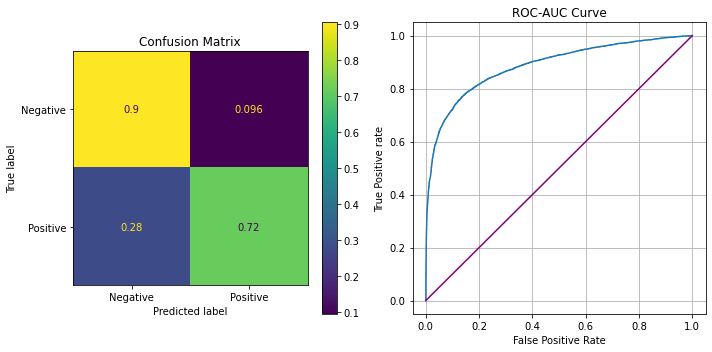

In [80]:
# Evaluate model performance
evaluate_model(y_bin_test2, y_bin_train2, 
               X_bin_test_tfidf2, X_bin_train_tfidf2, bin_svc2_grid, 2)

In [81]:
# Fit SVC model on binary training data with the best parameters and class weight parameter
bin_svc2_grid = LinearSVC(C=1.0, fit_intercept=True, loss='hinge', penalty='l2', 
                          tol=0.000001, class_weight='balanced')
bin_svc2_grid.fit(X_bin_train_tfidf2, y_bin_train2);

****TRAIN VS TEST ACCURACY****

 Training Score: 0.96 
 Test Score: 0.82 

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0       0.80      0.89      0.84     10916
           1       0.85      0.73      0.79      9193

    accuracy                           0.82     20109
   macro avg       0.83      0.81      0.82     20109
weighted avg       0.82      0.82      0.82     20109

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


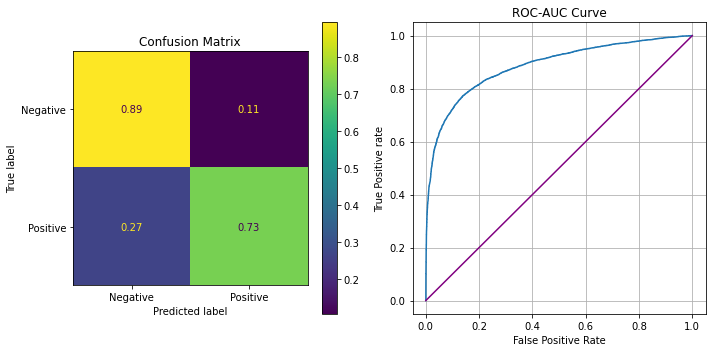

In [82]:
# Evaluate model performance
evaluate_model(y_bin_test2, y_bin_train2, 
               X_bin_test_tfidf2, X_bin_train_tfidf2, bin_svc2_grid, 2)

For this binary classification model, over-fitting issue was consistently present in the other models except for the Logistic Regression model. Surprisingly, the more complicated models and even the ones with GridSearch were not able to minimize this issue. Their F1 scores were also very similar to the F1 score of the Logistic Regression model. 

## Results
To evaluate the performance of each model, I used the accuracy of the train and test score, and F1 score for each classification. Interestingly, the winning models for the 3 different classification types were the Logistic Regression model. The best performing model from the GridSearch for each classification type did not return a greatly improved performance but rather required more time to run while returning a similar performance.

Out of the 3 Logistic Regression models, the binary classification model (Negative: 1-3, Positive: 4-5) performed the best. We will still examine the feature coefficients found from all three models as a reference point, but for extracting final insights, we will make use of our best perferming one. Below, we can find a roundup of each model's performance metrics.

### Multi-Class Best Model: Logistric Regression

****TRAIN VS TEST ACCURACY****

 Training Score: 0.9 
 Test Score: 0.76 

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0       0.81      0.85      0.83     10916
           1       0.23      0.34      0.27      1215
           2       0.82      0.71      0.76      7978

    accuracy                           0.76     20109
   macro avg       0.62      0.63      0.62     20109
weighted avg       0.78      0.76      0.77     20109

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


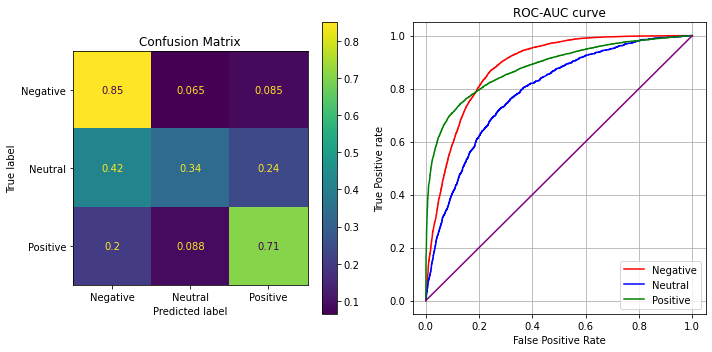

In [92]:
# Fit best performing Logistic Regression on multi-class data
# and display performance
best_multi_lr = LogisticRegression(max_iter=400, solver='lbfgs', class_weight='balanced')
best_multi_lr.fit(X_multi_train_tfidf, y_multi_train)
evaluate_model(y_multi_test, y_multi_train, 
               X_multi_test_tfidf, X_multi_train_tfidf, best_multi_lr)

### Binary Best Model I: Logistic Regression Model (Negative: 1-3, Positive: 4-5)

****TRAIN VS TEST ACCURACY****

 Training Score: 0.89 
 Test Score: 0.83 

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0       0.84      0.89      0.86     12131
           1       0.81      0.74      0.77      7978

    accuracy                           0.83     20109
   macro avg       0.82      0.81      0.82     20109
weighted avg       0.83      0.83      0.83     20109

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


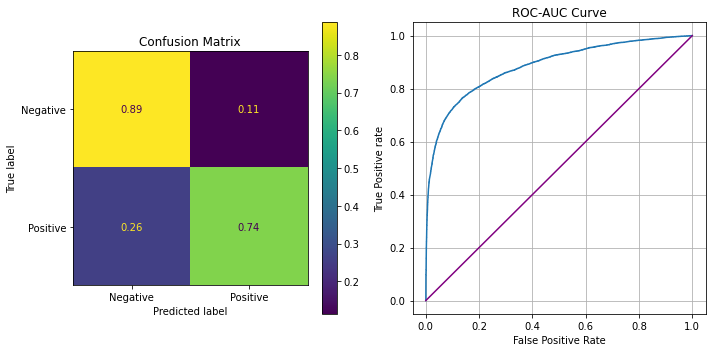

In [94]:
# Fit best performing Logistic Regression on binary data
# and display performance
best_bin_logreg = LogisticRegression(solver='liblinear', class_weight='balanced')
best_bin_logreg.fit(X_bin_train_tfidf, y_bin_train)
evaluate_model(y_bin_test, y_bin_train, 
               X_bin_test_tfidf, X_bin_train_tfidf, best_bin_logreg, 2)

### Binary Best Model II: Logistic Regression Model (Negative: 1-2, Positive 3-5)

****TRAIN VS TEST ACCURACY****

 Training Score: 0.88 
 Test Score: 0.82 

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0       0.80      0.88      0.84     10916
           1       0.83      0.74      0.79      9193

    accuracy                           0.82     20109
   macro avg       0.82      0.81      0.81     20109
weighted avg       0.82      0.82      0.81     20109

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


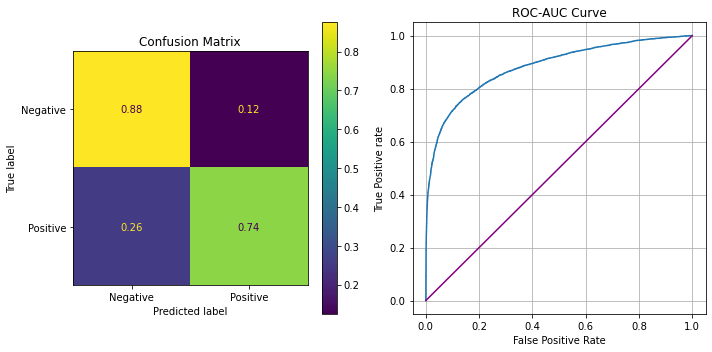

In [96]:
# Fit Logistic Regression model on binary training data
best_bin_logreg2 = LogisticRegression(solver='liblinear', class_weight='balanced')
best_bin_logreg2.fit(X_bin_train_tfidf2, y_bin_train2)
evaluate_model(y_bin_test2, y_bin_train2, 
               X_bin_test_tfidf2, X_bin_train_tfidf2, bin_logreg2, 2)

## Word Cloud Visaulization
Below, we will create DataFrames with different target varaibles to explore what words are associated with different sentiments.
1. Multi-Class Sentiment: Negative (1-2), Neutral (3), Positive (4-5)
2. Binary Classification Sentiment: Negative (1-3), Positive (4-5)
3. Binary Classification Sentiment: Negative (1-2), Positive (3-5)

### Multi-Class Sentiment WordClouds

In [97]:
# Create and display DataFrames for multi-class sentiments
multi_pos_df = final_df[final_df['multi_sent']==2]
multi_neut_df = final_df[final_df['multi_sent']==1]
multi_neg_df = final_df[final_df['multi_sent']==0]
display(multi_neg_df, multi_neut_df, multi_pos_df)

,date,userName,combined_text,rating,multi_sent,sent_bin_3up,sent_bin_4up
1,5/20/20 18:18,weterpest,"Unreliable, Unhelpful. They have such a great selection of restaurants but service is SO unreliable! I have ordered maybe 5 times through them and the last three have all been really frustrating. The last time I kept calling saying that the driver’s location on the map was not updating and the estimated delivery time kept getting pushed back. The customer service people would just read the estimated delivery time and disconnect the chat without ever reaching out to the driver. Two and a half hours after my food had been picked up and still not delivered, I finally figured out that the driver had car issues and the order was cancelled (3+ hours after being placed). This same type of situation has happened two times other times with the driver having car issues after picking up my order and getting here super late with food that has been sitting out in a car for at least an hour after being picked up, and customer service just doesn’t really do anything to figure it out or get a replacement order sent. I get that car issues happen, but three times in a row with this app isn’t a great track record considering that this has NEVER happened with competitor apps. I was really excited when I found Caviar because of the really great selection of restaurants, but I ended up deleting my account after this last time.",2,0,0,0
2,11/4/20 0:18,Mighty Power,"Deliveries take too long. Well for the last six months understanding pandemic aside because Uber and seamless are doing the same and they are not as late as they are and you are able to reach them, they apologize and always find the best solution or at least give you a credit to make it worthwhile. Caviar support team is easy on saying goodbyes, take a long time and then get back to you with no answer or problem fix, so for the last 10 or so orders all close by restaurants from my house, I waited about an hour to find out the driver was lost and was calling me in Spanish or the driver never showed up, and mostly I had to basically cancel the order and re-order again, I am finding out that the only way to get an order is to first order and then contact Support to make sure they are reaching out to somebody to get your food picked up, I can’t be using an app as such and always waiting around an hour and sometimes get my food cold because it’s been out there so long or never get it and re-order. The worse is customer service that basically tells you it is what it is, goodbye because they have to help somebody else. Knowing seamless GrubHub and Uber eats they always try and they always give you some sort of credit to make up for it immediately before you even asked for it to try to alleviate the problem. Caviar never does until you force their hand. I had just signed up for a subscription plan which I will be canceling since this is just not acceptable",1,0,0,0
3,12/24/18 2:52,anogawa,"Horrendous customer service. I would say the app experience is superior to other delivery apps, which is a shame because the customer service is terrible. Our expected delivery time upon ordering was 8:24 pm, which eventually got pushed back to 8:49 pm. The app notified us of the delay, which is better than other food delivery apps in which I’ve experienced delays but wasn’t notified. However, when order finally arrived, my husband noticed the delivery guy gave us the wrong order. Turns out he had given our order to the wrong person. Driver says he’ll contact support, saying they’ll probably re-deliver. I contact customer support on my own, and the rep offers a refund...okay, but at this point it’s past 9 pm and we still haven’t had dinner. I reply back saying it’s not okay. Rep blames it on me, saying that I selected that the items were missing and I preferred a refund. Except there are no options for “my driver messed up, get me a new order asap”. Eventually he offers $10. Their twitter account offers me $30, s

,date,userName,combined_text,rating,multi_sent,sent_bin_3up,sent_bin_4up
25,1/23/20 22:02,erinbeitel,"Compromised Account Policy. I generally really love everything about Caviar. However, my account was compromised today. Multiple changes made: name change, delivery address added, phone number changed - all things that should be red flags if fraud monitoring is in place. Realistically if my phone number is changed in the app I should probably need to verify that change via email. The order was placed (lobster delivery to NY) and I found out about it via a status update to my email. I immediately contacted them through the app and always asked for several verifying pieces of info. Upon giving them my account was nuked and I was told if I’d like to use caviar I should signup with a new email. (Lol) No way to make sure there weren’t other fraudulent orders, contact support with a ticket associated with the account, get confirmation the account is actually deactivated.. etc. Just K BYE. Um.. let’s revisit this. I appreciate the swift response but that was a pretty over the top reaction to something that pretty obviously seemed to require 1) a hold on my account and 2) a link to reset my password sent to my email.",3,1,1,0
68,5/16/19 18:37,Kittykattorrez,"extremely annoying lack search features. I love caviar. Amazing customer service quick delivery, order tracking, etc. However, I HATE their app layout so much that I am writing the first app review I’ve ever written. There are no advanced search features, no ways to pick a category of food or price point or delivery time or “open now”. I think this app would be highly improved with the addition of advanced search. I’d love to be able to search by distance, food type (Thai/Italian/Mexican etc. But also breakfast/lunch/dessert), open late, dollar signs, delivery fee. The app is so annoying because it lists restaurants and the specifics of each restaurant but all you can do is scroll through these, there is no way to search specifically for what you want. This feature alone makes me want to delete the app entirely and download some other delivery app.",3,1,1,0
133,12/2/20 23:18,Horriblehobbes,"Poor app service since merger/buyout. Definitely noticed a lot of issues with the app after DoorDash took over. It logs me out all the time, tells me I need an update when I already have completed one, etc. Seems buggy or just poorly integrated. Haven’t had issues as of yet with physical services, but I do see other people have and so I’m a little weary. For the amount of fees we pay for delivery I feel like the service should be a bit better and more reliable. Seems like I may as well just order directly from the restaurant when I can. Update two weeks later: your app still blows. I can’t even use it on my phone because it wants me to update and times out every time. Your app blows",3,1,1,0
167,8/28/19 23:30,jimkbobl,"Great app. Company could be better.. So the app works well. Two things about the company are disingenuous and make me think twice about their service. 1. They charge a “Service Fee,” a “Delivery Fee,” and a “Courier Tip,” which tonight added an additional $31 to my order. 2. When they don’t have enough couriers available, they make it look like the restaurant is taking longer. They actually wait to send the order to the restaurant until they have a courier available, but tell the app user that the restaurant is preparing the order. I learned this the hard way trying to get an order from a nearby restaurant. Greater honesty and less cash grab would make this a better service.",3,1,1,0
194,5/24/20 0:09,Teisen77,"volume warnings for hidden delays. I acknowledge that many urbanites are relying on the service in light of COVID-19 but I was disappointed to place a repeat order with a trusted restaurant and then be strung along with delays that extended 90 minutes and ultimately no delivery. I had no way of canceling my order and it would be nice to have been warned that the driver to o

,date,userName,combined_text,rating,multi_sent,sent_bin_3up,sent_bin_4up
0,9/17/20 17:12,Good64774,"Mixed feelings. Caviar used to be a great app. Top quality restaurants, working app, good service. But they recently merged with DoorDash which I have found to be a notoriously worse app. Since the merger, the app seemed to change and your delivery drivers are now from “Dashers”. When you order now and have an issue and try to chat Caviar sometimes their servers are down or you can’t get a hold of them. Your left to call the restaurant who may tell you your food has been ready for a half hour but DoorDash/Caviar hasn’t picked it up and is unreachable right now. Typical DoorDash problems. Although the app needs work and the DoorDash merger is disappointing. When I finally have been able to reach the company and explain various issues. Caviar does issue refunds and credits. This is a positive that some apps like UberEats or Postmates rarely provide. Caviar’s credits/refunds are close to the high level of Seamless/Grubhub. Only reason Seamless/Grubhub are better in this area is refunds and credits can be issued automatically in the app with ease if you run into issues. Caviar, as mentioned above can be difficult to reach and requires more explanation. Ultimately if the Caviar app improves the accessibility of their customer service and they continue to provide credits, I would consider changing my review back to 5 stars. On the other hand, if I keep running into these app issues or if they stop providing credits and refunds for issues I would lower the rating. I’m on the fence.",5,2,1,1
20,10/10/20 16:31,annriseki,"Noticeable enhancements. I hadn’t used Caviar for 6 months because I was in a different state til last week. One of my favorite Dominican restaurants (shoutout to Puerto Viejo!) only offers delivery on Caviar so I had it re-installed. I’m used to the Uber Eats interface but man I love how Caviar always has high quality pics of the food. I also noticed the subtle UI/UX enhancements with the text on the buttons and even the ability to “gift” meals during checkout- really neat! Food delivery “gift giving” is definitely a thing so I thought it was very good how that’s a legit option on the app now. One thing I didn’t like was how longer menu categories have a “toggle to see more” functionality now. I get that it saves screen real estate but I missed it at first and was wondering if the restaurant condensed their menu. Other than that, really happy to be back on this app and thanks for the generous 50% off new user promo :P literally coming back because of Puerto Viejo but the app is so nice that I’ll try to use it more than its competitor, haha. Cheers guys stay safe.",5,2,1,1
21,1/27/20 18:35,leoprd195,"Delete your Caviar app ASAP!!. My account was hacked and within a two-day period, I was charged for over 1k of deliveries all across the country-- sometimes within an hour of each other to different states. I received no alerts that orders were made and only found out when one of the orders was not able to be fulfilled. I've contacted Caviar via email and their website multiple times (since they have no phone number) and have not received a response. It is absolutely WILD to me that they don't have systems in place to catch suspicious orders given how often they are hacked. Moreover, my home and work address were also compromised since they were stored in the app. To refer just people to their banks to dispute the charge is incredibly inappropriate since it was not my credit card that was stolen, it was YOUR PLATFORM that was compromised. Yet, Caviar takes ZERO responsibility. I now have to get a new credit card and update every single one of my autopay services.",5,2,1,1
40,2/25/20 2:53,GoosieMoose,"Horrendous customer service. I keep ordering via caviar thinking they’ll get their operations in order, but every time it’s AT LEAST an hour late. I’m going to stop for real this time! It’s been late in every scenario— when I’ve

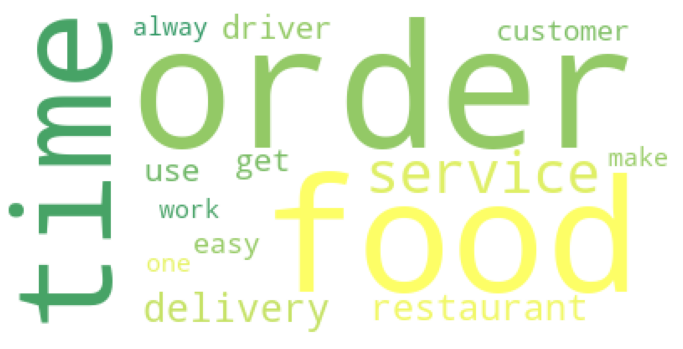

In [98]:
# Generate positive wordcloud for multi-class sentiment
multi_pos_tokens = wordcloud_prep(multi_pos_df['combined_text'], stopwords_list)
multi_pos_wc = generate_wordcloud(multi_pos_tokens, stopwords_list, 
                                  colormap='summer', background_color='white', 
                                  contour_color='green')

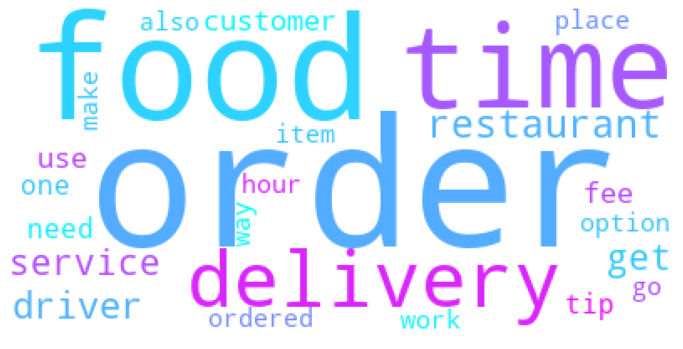

In [99]:
# Generate neutral wordcloud for multi-class sentiment
multi_neut_tokens = wordcloud_prep(multi_neut_df['combined_text'], 
                                   stopwords_list)
multi_neut_wc = generate_wordcloud(multi_neut_tokens, stopwords_list, 
                                   colormap='cool', background_color='white')

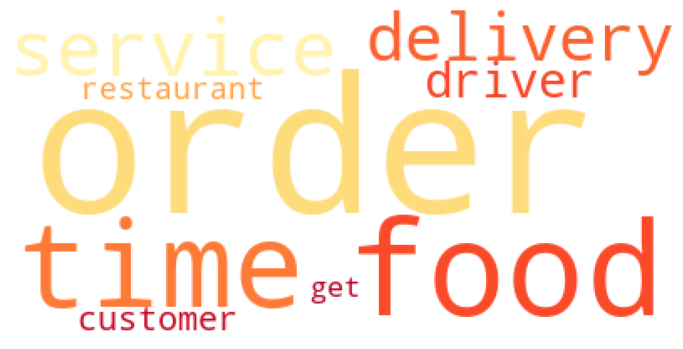

In [100]:
# Generate negative wordcloud for multi-class sentiment
multi_neg_tokens = wordcloud_prep(multi_neg_df['combined_text'], stopwords_list)
multi_neg_wc = generate_wordcloud(multi_neg_tokens, stopwords_list, 
                                  colormap='YlOrRd', background_color='white', 
                                  contour_color='red')

### Binary Classficiation Sentiment WordCloud (Negative: 1-3, Positive: 4-5)

In [101]:
# Create and display DataFrames for binary sentiments
bin_pos_df = final_df[final_df['sent_bin_4up']==1]
bin_neg_df = final_df[final_df['sent_bin_4up']==0]
display(bin_neg_df, bin_pos_df)

,date,userName,combined_text,rating,multi_sent,sent_bin_3up,sent_bin_4up
1,5/20/20 18:18,weterpest,"Unreliable, Unhelpful. They have such a great selection of restaurants but service is SO unreliable! I have ordered maybe 5 times through them and the last three have all been really frustrating. The last time I kept calling saying that the driver’s location on the map was not updating and the estimated delivery time kept getting pushed back. The customer service people would just read the estimated delivery time and disconnect the chat without ever reaching out to the driver. Two and a half hours after my food had been picked up and still not delivered, I finally figured out that the driver had car issues and the order was cancelled (3+ hours after being placed). This same type of situation has happened two times other times with the driver having car issues after picking up my order and getting here super late with food that has been sitting out in a car for at least an hour after being picked up, and customer service just doesn’t really do anything to figure it out or get a replacement order sent. I get that car issues happen, but three times in a row with this app isn’t a great track record considering that this has NEVER happened with competitor apps. I was really excited when I found Caviar because of the really great selection of restaurants, but I ended up deleting my account after this last time.",2,0,0,0
2,11/4/20 0:18,Mighty Power,"Deliveries take too long. Well for the last six months understanding pandemic aside because Uber and seamless are doing the same and they are not as late as they are and you are able to reach them, they apologize and always find the best solution or at least give you a credit to make it worthwhile. Caviar support team is easy on saying goodbyes, take a long time and then get back to you with no answer or problem fix, so for the last 10 or so orders all close by restaurants from my house, I waited about an hour to find out the driver was lost and was calling me in Spanish or the driver never showed up, and mostly I had to basically cancel the order and re-order again, I am finding out that the only way to get an order is to first order and then contact Support to make sure they are reaching out to somebody to get your food picked up, I can’t be using an app as such and always waiting around an hour and sometimes get my food cold because it’s been out there so long or never get it and re-order. The worse is customer service that basically tells you it is what it is, goodbye because they have to help somebody else. Knowing seamless GrubHub and Uber eats they always try and they always give you some sort of credit to make up for it immediately before you even asked for it to try to alleviate the problem. Caviar never does until you force their hand. I had just signed up for a subscription plan which I will be canceling since this is just not acceptable",1,0,0,0
3,12/24/18 2:52,anogawa,"Horrendous customer service. I would say the app experience is superior to other delivery apps, which is a shame because the customer service is terrible. Our expected delivery time upon ordering was 8:24 pm, which eventually got pushed back to 8:49 pm. The app notified us of the delay, which is better than other food delivery apps in which I’ve experienced delays but wasn’t notified. However, when order finally arrived, my husband noticed the delivery guy gave us the wrong order. Turns out he had given our order to the wrong person. Driver says he’ll contact support, saying they’ll probably re-deliver. I contact customer support on my own, and the rep offers a refund...okay, but at this point it’s past 9 pm and we still haven’t had dinner. I reply back saying it’s not okay. Rep blames it on me, saying that I selected that the items were missing and I preferred a refund. Except there are no options for “my driver messed up, get me a new order asap”. Eventually he offers $10. Their twitter account offers me $30, s

,date,userName,combined_text,rating,multi_sent,sent_bin_3up,sent_bin_4up
0,9/17/20 17:12,Good64774,"Mixed feelings. Caviar used to be a great app. Top quality restaurants, working app, good service. But they recently merged with DoorDash which I have found to be a notoriously worse app. Since the merger, the app seemed to change and your delivery drivers are now from “Dashers”. When you order now and have an issue and try to chat Caviar sometimes their servers are down or you can’t get a hold of them. Your left to call the restaurant who may tell you your food has been ready for a half hour but DoorDash/Caviar hasn’t picked it up and is unreachable right now. Typical DoorDash problems. Although the app needs work and the DoorDash merger is disappointing. When I finally have been able to reach the company and explain various issues. Caviar does issue refunds and credits. This is a positive that some apps like UberEats or Postmates rarely provide. Caviar’s credits/refunds are close to the high level of Seamless/Grubhub. Only reason Seamless/Grubhub are better in this area is refunds and credits can be issued automatically in the app with ease if you run into issues. Caviar, as mentioned above can be difficult to reach and requires more explanation. Ultimately if the Caviar app improves the accessibility of their customer service and they continue to provide credits, I would consider changing my review back to 5 stars. On the other hand, if I keep running into these app issues or if they stop providing credits and refunds for issues I would lower the rating. I’m on the fence.",5,2,1,1
20,10/10/20 16:31,annriseki,"Noticeable enhancements. I hadn’t used Caviar for 6 months because I was in a different state til last week. One of my favorite Dominican restaurants (shoutout to Puerto Viejo!) only offers delivery on Caviar so I had it re-installed. I’m used to the Uber Eats interface but man I love how Caviar always has high quality pics of the food. I also noticed the subtle UI/UX enhancements with the text on the buttons and even the ability to “gift” meals during checkout- really neat! Food delivery “gift giving” is definitely a thing so I thought it was very good how that’s a legit option on the app now. One thing I didn’t like was how longer menu categories have a “toggle to see more” functionality now. I get that it saves screen real estate but I missed it at first and was wondering if the restaurant condensed their menu. Other than that, really happy to be back on this app and thanks for the generous 50% off new user promo :P literally coming back because of Puerto Viejo but the app is so nice that I’ll try to use it more than its competitor, haha. Cheers guys stay safe.",5,2,1,1
21,1/27/20 18:35,leoprd195,"Delete your Caviar app ASAP!!. My account was hacked and within a two-day period, I was charged for over 1k of deliveries all across the country-- sometimes within an hour of each other to different states. I received no alerts that orders were made and only found out when one of the orders was not able to be fulfilled. I've contacted Caviar via email and their website multiple times (since they have no phone number) and have not received a response. It is absolutely WILD to me that they don't have systems in place to catch suspicious orders given how often they are hacked. Moreover, my home and work address were also compromised since they were stored in the app. To refer just people to their banks to dispute the charge is incredibly inappropriate since it was not my credit card that was stolen, it was YOUR PLATFORM that was compromised. Yet, Caviar takes ZERO responsibility. I now have to get a new credit card and update every single one of my autopay services.",5,2,1,1
40,2/25/20 2:53,GoosieMoose,"Horrendous customer service. I keep ordering via caviar thinking they’ll get their operations in order, but every time it’s AT LEAST an hour late. I’m going to stop for real this time! It’s been late in every scenario— when I’ve

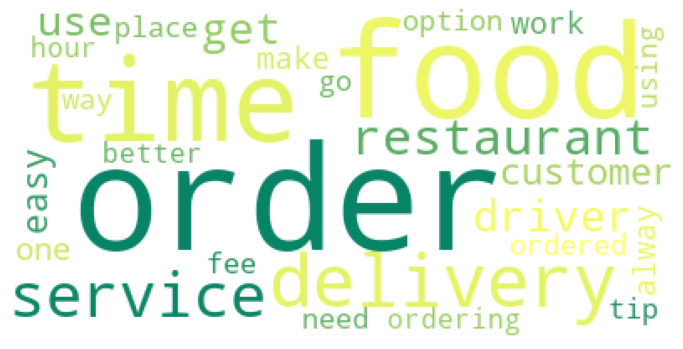

In [128]:
# Generate positive wordcloud for binary sentiment
bin_pos_tokens = wordcloud_prep(bin_pos_df['combined_text'], stopwords_list)
bin_pos_wc = generate_wordcloud(bin_pos_tokens, stopwords_list, 
                                colormap='summer', background_color='white', 
                                contour_color='green')

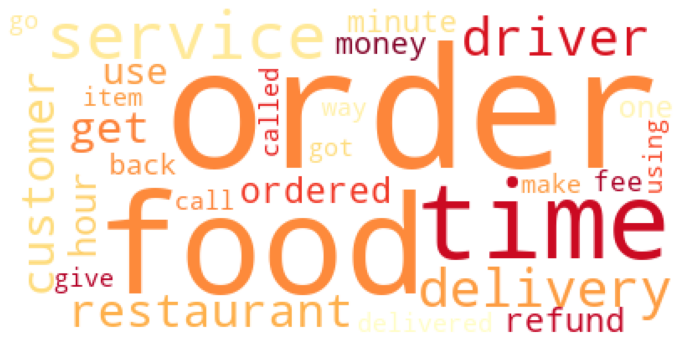

In [103]:
# Generate negative wordcloud for binary sentiment
bin_neg_tokens = wordcloud_prep(bin_neg_df['combined_text'], stopwords_list)
bin_neg_wc = generate_wordcloud(bin_neg_tokens, stopwords_list, 
                                colormap='YlOrRd', background_color='white', 
                                contour_color='red')

### Binary Classficiation Sentiment WordCloud (Negative: 1-2, Positive: 3-5)

In [104]:
# Create and display DataFrames for binary sentiments
bin_pos_df = final_df[final_df['sent_bin_3up']==1]
bin_neg_df = final_df[final_df['sent_bin_3up']==0]
display(bin_neg_df, bin_pos_df)

,date,userName,combined_text,rating,multi_sent,sent_bin_3up,sent_bin_4up
1,5/20/20 18:18,weterpest,"Unreliable, Unhelpful. They have such a great selection of restaurants but service is SO unreliable! I have ordered maybe 5 times through them and the last three have all been really frustrating. The last time I kept calling saying that the driver’s location on the map was not updating and the estimated delivery time kept getting pushed back. The customer service people would just read the estimated delivery time and disconnect the chat without ever reaching out to the driver. Two and a half hours after my food had been picked up and still not delivered, I finally figured out that the driver had car issues and the order was cancelled (3+ hours after being placed). This same type of situation has happened two times other times with the driver having car issues after picking up my order and getting here super late with food that has been sitting out in a car for at least an hour after being picked up, and customer service just doesn’t really do anything to figure it out or get a replacement order sent. I get that car issues happen, but three times in a row with this app isn’t a great track record considering that this has NEVER happened with competitor apps. I was really excited when I found Caviar because of the really great selection of restaurants, but I ended up deleting my account after this last time.",2,0,0,0
2,11/4/20 0:18,Mighty Power,"Deliveries take too long. Well for the last six months understanding pandemic aside because Uber and seamless are doing the same and they are not as late as they are and you are able to reach them, they apologize and always find the best solution or at least give you a credit to make it worthwhile. Caviar support team is easy on saying goodbyes, take a long time and then get back to you with no answer or problem fix, so for the last 10 or so orders all close by restaurants from my house, I waited about an hour to find out the driver was lost and was calling me in Spanish or the driver never showed up, and mostly I had to basically cancel the order and re-order again, I am finding out that the only way to get an order is to first order and then contact Support to make sure they are reaching out to somebody to get your food picked up, I can’t be using an app as such and always waiting around an hour and sometimes get my food cold because it’s been out there so long or never get it and re-order. The worse is customer service that basically tells you it is what it is, goodbye because they have to help somebody else. Knowing seamless GrubHub and Uber eats they always try and they always give you some sort of credit to make up for it immediately before you even asked for it to try to alleviate the problem. Caviar never does until you force their hand. I had just signed up for a subscription plan which I will be canceling since this is just not acceptable",1,0,0,0
3,12/24/18 2:52,anogawa,"Horrendous customer service. I would say the app experience is superior to other delivery apps, which is a shame because the customer service is terrible. Our expected delivery time upon ordering was 8:24 pm, which eventually got pushed back to 8:49 pm. The app notified us of the delay, which is better than other food delivery apps in which I’ve experienced delays but wasn’t notified. However, when order finally arrived, my husband noticed the delivery guy gave us the wrong order. Turns out he had given our order to the wrong person. Driver says he’ll contact support, saying they’ll probably re-deliver. I contact customer support on my own, and the rep offers a refund...okay, but at this point it’s past 9 pm and we still haven’t had dinner. I reply back saying it’s not okay. Rep blames it on me, saying that I selected that the items were missing and I preferred a refund. Except there are no options for “my driver messed up, get me a new order asap”. Eventually he offers $10. Their twitter account offers me $30, s

,date,userName,combined_text,rating,multi_sent,sent_bin_3up,sent_bin_4up
0,9/17/20 17:12,Good64774,"Mixed feelings. Caviar used to be a great app. Top quality restaurants, working app, good service. But they recently merged with DoorDash which I have found to be a notoriously worse app. Since the merger, the app seemed to change and your delivery drivers are now from “Dashers”. When you order now and have an issue and try to chat Caviar sometimes their servers are down or you can’t get a hold of them. Your left to call the restaurant who may tell you your food has been ready for a half hour but DoorDash/Caviar hasn’t picked it up and is unreachable right now. Typical DoorDash problems. Although the app needs work and the DoorDash merger is disappointing. When I finally have been able to reach the company and explain various issues. Caviar does issue refunds and credits. This is a positive that some apps like UberEats or Postmates rarely provide. Caviar’s credits/refunds are close to the high level of Seamless/Grubhub. Only reason Seamless/Grubhub are better in this area is refunds and credits can be issued automatically in the app with ease if you run into issues. Caviar, as mentioned above can be difficult to reach and requires more explanation. Ultimately if the Caviar app improves the accessibility of their customer service and they continue to provide credits, I would consider changing my review back to 5 stars. On the other hand, if I keep running into these app issues or if they stop providing credits and refunds for issues I would lower the rating. I’m on the fence.",5,2,1,1
20,10/10/20 16:31,annriseki,"Noticeable enhancements. I hadn’t used Caviar for 6 months because I was in a different state til last week. One of my favorite Dominican restaurants (shoutout to Puerto Viejo!) only offers delivery on Caviar so I had it re-installed. I’m used to the Uber Eats interface but man I love how Caviar always has high quality pics of the food. I also noticed the subtle UI/UX enhancements with the text on the buttons and even the ability to “gift” meals during checkout- really neat! Food delivery “gift giving” is definitely a thing so I thought it was very good how that’s a legit option on the app now. One thing I didn’t like was how longer menu categories have a “toggle to see more” functionality now. I get that it saves screen real estate but I missed it at first and was wondering if the restaurant condensed their menu. Other than that, really happy to be back on this app and thanks for the generous 50% off new user promo :P literally coming back because of Puerto Viejo but the app is so nice that I’ll try to use it more than its competitor, haha. Cheers guys stay safe.",5,2,1,1
21,1/27/20 18:35,leoprd195,"Delete your Caviar app ASAP!!. My account was hacked and within a two-day period, I was charged for over 1k of deliveries all across the country-- sometimes within an hour of each other to different states. I received no alerts that orders were made and only found out when one of the orders was not able to be fulfilled. I've contacted Caviar via email and their website multiple times (since they have no phone number) and have not received a response. It is absolutely WILD to me that they don't have systems in place to catch suspicious orders given how often they are hacked. Moreover, my home and work address were also compromised since they were stored in the app. To refer just people to their banks to dispute the charge is incredibly inappropriate since it was not my credit card that was stolen, it was YOUR PLATFORM that was compromised. Yet, Caviar takes ZERO responsibility. I now have to get a new credit card and update every single one of my autopay services.",5,2,1,1
25,1/23/20 22:02,erinbeitel,"Compromised Account Policy. I generally really love everything about Caviar. However, my account was compromised today. Multiple changes made: name change, delivery address added, phone number changed - all things that should be

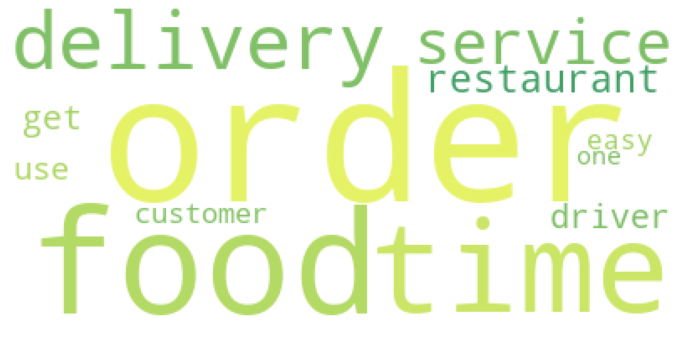

In [105]:
# Generate positive wordcloud for binary sentiment
bin_pos_tokens = wordcloud_prep(bin_pos_df['combined_text'], stopwords_list)
bin_pos_wc = generate_wordcloud(bin_pos_tokens, stopwords_list, 
                                colormap='summer', background_color='white', 
                                contour_color='green')

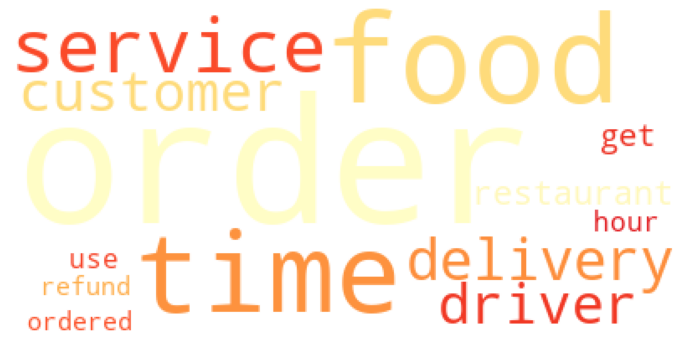

In [106]:
# Generate negative wordcloud for binary sentiment
bin_neg_tokens = wordcloud_prep(bin_neg_df['combined_text'], stopwords_list)
bin_neg_wc = generate_wordcloud(bin_neg_tokens, stopwords_list, 
                                colormap='YlOrRd', background_color='white', 
                                contour_color='red')

Our wordclouds show that users write about same topics for all three sentiments. This tells us that users' top priority is whether their food was delivered in timely manner. There are some words related to additional charges, such as the service fees or delivery fees in the neutral sentiment, which could possibly indicate that users could be happier using an app without those charges. 

## Model Feature Coefficient Analysis
In order to easily visualize what words had a heavier impact on the classification tasks, we will create barplots of the feature coefficients. For Logistic Regression, our units are in log odds, and so we can use the resulting visuals to get an idea of how much importance certain words relative to other words.

### Multi-class Classification

In [107]:
# Extract coefficients for positive classification from multi-class LogReg model
feature_names_multi = vectorizer_multi.get_feature_names()
log_coeff_multi = pd.Series(best_multi_lr.coef_[2], 
                            index=feature_names_multi).sort_values(ascending=False)
lr_multi_pos = log_coeff_multi.head(30)
lr_multi_pos

easy          6.130711
convenient    3.932167
fast          3.253323
life          3.156281
quick         3.078602
delicious     2.515886
home          2.337557
easier        2.314486
use time      2.223926
works         2.195680
wish          2.184385
thanks        2.123087
hot           2.122155
cook          2.119141
far           2.016273
favorite      1.986008
easy use      1.936212
keep work     1.880404
wonderful     1.843877
little        1.827836
helps         1.821311
efficient     1.784920
overall       1.732815
definitely    1.700693
saves         1.664274
quickly       1.657168
always        1.643448
lifesaver     1.612699
easy order    1.538224
enjoy         1.530256
dtype: float64

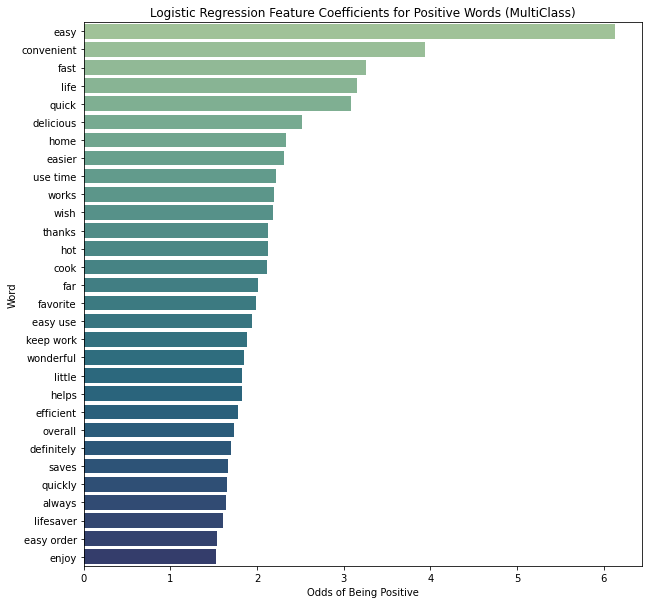

In [113]:
# Create bar plot of feature coefficients for multiclass positive as log odds
barplot_series(lr_multi_pos, 
               "Logistic Regression Feature Coefficients for Positive Words (MultiClass)", 
               "Odds of Being Positive", "Word", 'crest')

In [108]:
# Extract coefficients for neutral classification from multi-class LogReg model
log_coeff_multi = pd.Series(best_multi_lr.coef_[1], 
                            index=feature_names_multi).sort_values(ascending=False)
lr_multi_neut = log_coeff_multi.head(30)
lr_multi_neut

however                  4.082775
needs                    4.039384
ok                       3.284714
annoying                 3.069432
okay                     3.029236
hit miss                 2.857899
three stars              2.634081
meh                      2.495993
fees                     2.477774
bit                      2.343813
lot                      2.315298
average                  2.169609
recently                 2.166091
lately                   2.135994
limited                  2.117366
please                   2.060699
improved                 2.052241
improve                  2.042801
location                 2.029222
discount                 2.012993
ruined loved             1.982032
tip                      1.919185
times                    1.915052
need                     1.855241
restaurants available    1.830665
fine                     1.825760
service super            1.799827
there’s                  1.794079
often                    1.768670
inconsistent  

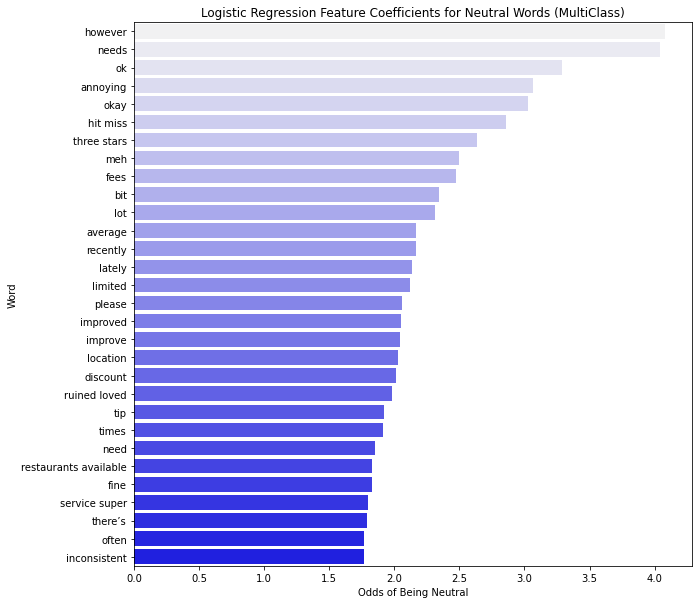

In [114]:
# Create bar plot of feature coefficients for multiclass neutral as log odds
barplot_series(lr_multi_neut, 
               "Logistic Regression Feature Coefficients for Neutral Words (MultiClass)", 
               "Odds of Being Neutral", "Word",'light:b')

In [109]:
# Extract coefficients for negative classification from multi-class LogReg model
feature_names_multi = vectorizer_multi.get_feature_names()
log_coeff_multi = pd.Series(best_multi_lr.coef_[0], 
                            index=feature_names_multi).sort_values(ascending=False)
lr_multi_neg = log_coeff_multi.head(30)
lr_multi_neg

company        3.888867
bring back     3.710163
waste          3.569291
garbage        3.217313
ruined         3.207868
hours          2.885073
trash          2.808093
download       2.797694
back           2.750117
support        2.680049
replacement    2.626470
tried          2.515224
zero           2.506242
account        2.490524
hour           2.426888
ridiculous     2.381855
money          2.372668
sign           2.348065
told           2.340066
ever           2.321654
bother         2.320075
miss           2.308168
refund         2.246600
avoid          2.208306
login          2.207651
anything       2.136121
scam           2.127203
used           2.108567
gone           2.087190
crap           2.085070
dtype: float64

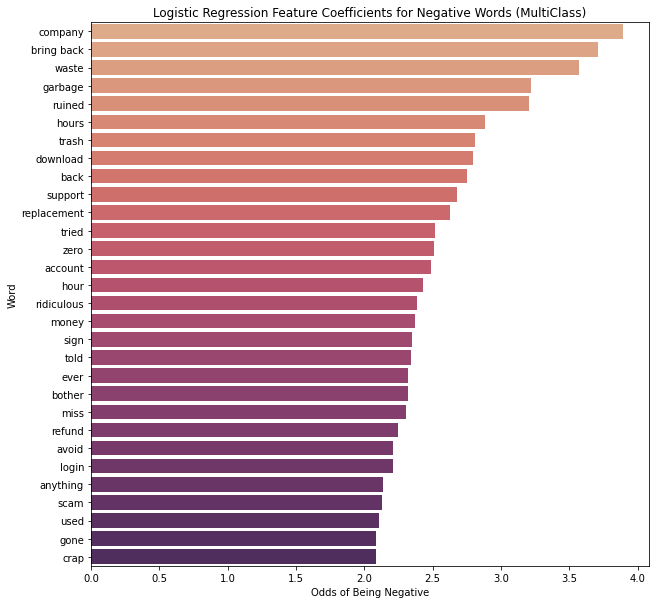

In [115]:
# Create bar plot of feature coefficients for multiclass negative as log odds
barplot_series(lr_multi_neg, 
               "Logistic Regression Feature Coefficients for Negative Words (MultiClass)", 
               "Odds of Being Negative", "Word", 'flare')

### Binary: Negative (1-3), Positive (4-5)

In [118]:
# Extract coefficients for positive classification from binary LogReg model
feature_names_bin = vectorizer_bin.get_feature_names()
lr_coeff_bin = pd.Series(best_bin_logreg.coef_.flatten(), 
                          index=feature_names_bin).sort_values(ascending=False)
lr_bin_pos = lr_coeff_bin.head(25)
lr_bin_pos

easy          9.246096
convenient    6.185865
fast          4.624459
quick         4.249722
life          3.871222
easy use      3.628958
wish          3.554844
hot           3.448364
home          3.434895
works         3.381004
easier        3.340007
delicious     3.280668
use time      3.276774
little        2.934741
overall       2.855266
wonderful     2.778022
efficient     2.678994
always        2.588299
definitely    2.549221
super         2.542613
favorite      2.541910
keep work     2.529605
far           2.514853
cook          2.479674
quickly       2.443169
dtype: float64

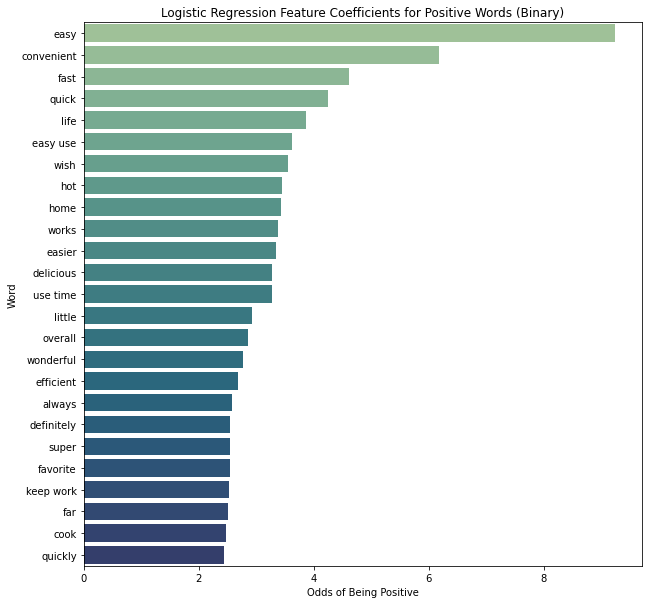

In [119]:
# Create bar plot of feature coefficients for binary positive as log odds
barplot_series(lr_bin_pos, 
               "Logistic Regression Feature Coefficients for Positive Words (Binary)", 
               "Odds of Being Positive", "Word", 'crest')

In [120]:
# EExtract coefficients for negative classification from binary LogReg model
lr_bin_neg = lr_coeff_bin.tail(25)
lr_bin_neg

customers     -3.079004
anything      -3.154440
told          -3.182503
completely    -3.223882
doesn’t       -3.227573
always late   -3.245383
trash         -3.299750
sign          -3.422099
support       -3.466499
late          -3.486831
gone          -3.532381
cold          -3.592773
hour          -3.642144
hours         -3.644658
company       -3.734309
account       -3.784312
refund        -3.792631
garbage       -3.881689
customer      -3.882557
fees          -3.957789
back          -4.372899
ruined        -4.424545
miss          -4.872273
waste         -4.894115
bring back    -5.027472
dtype: float64

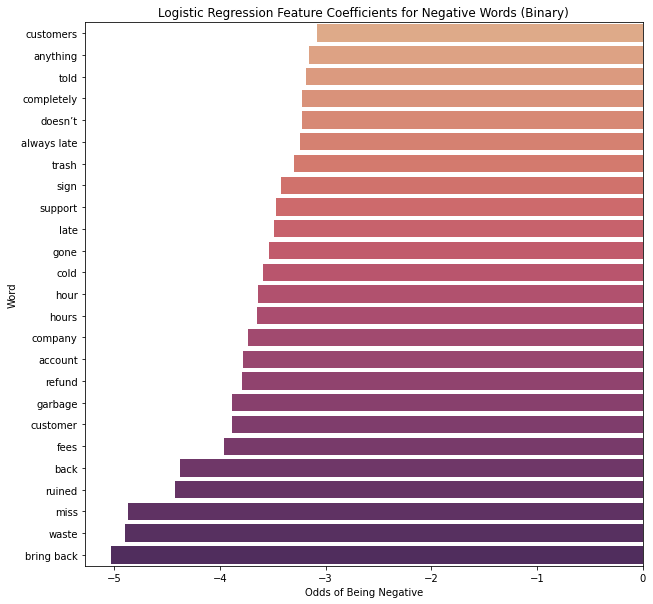

In [121]:
# Create bar plot of feature coefficients for binary negative as log odds
barplot_series(lr_bin_neg, 
               "Logistic Regression Feature Coefficients for Negative Words (Binary)", 
               "Odds of Being Negative", "Word", 'flare')

### Binary: Negative (1-2), Positive (3-5)

In [122]:
# Extract coefficients for positive classification from binary LogReg model
feature_names_bin = vectorizer_bin.get_feature_names()
lr_coeff_bin2 = pd.Series(best_bin_logreg2.coef_.flatten(), 
                          index=feature_names_bin).sort_values(ascending=False)
lr_bin_pos2 = lr_coeff_bin.head(25)
lr_bin_pos2

easy          9.246096
convenient    6.185865
fast          4.624459
quick         4.249722
life          3.871222
easy use      3.628958
wish          3.554844
hot           3.448364
home          3.434895
works         3.381004
easier        3.340007
delicious     3.280668
use time      3.276774
little        2.934741
overall       2.855266
wonderful     2.778022
efficient     2.678994
always        2.588299
definitely    2.549221
super         2.542613
favorite      2.541910
keep work     2.529605
far           2.514853
cook          2.479674
quickly       2.443169
dtype: float64

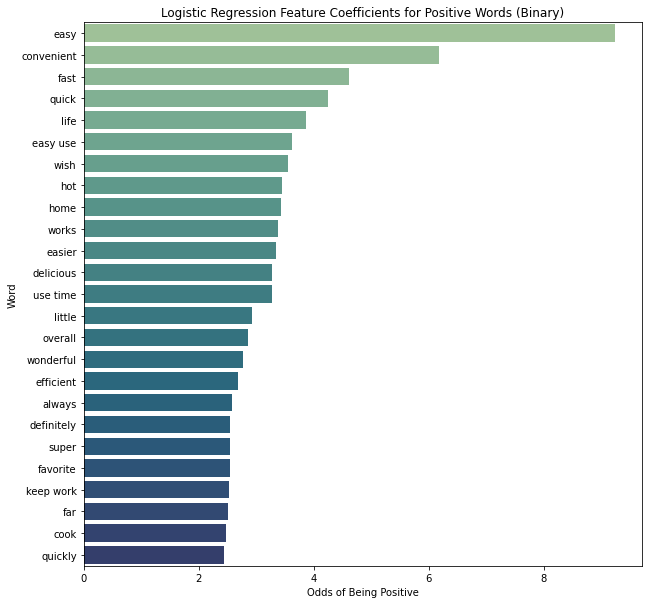

In [123]:
# Create bar plot of feature coefficients for binary positive as log odds
barplot_series(lr_bin_pos2, 
               "Logistic Regression Feature Coefficients for Positive Words (Binary)", 
               "Odds of Being Positive", "Word", 'crest')

In [126]:
# EExtract coefficients for negative classification from binary LogReg model
lr_bin_neg2 = lr_coeff_bin2.tail(25)
lr_bin_neg2

download      -3.296085
money         -3.321591
ridiculous    -3.331941
tried         -3.332312
zero          -3.333825
late          -3.337285
cold          -3.376043
replacement   -3.431202
told          -3.452199
gone          -3.526077
sign          -3.580842
trash         -3.739565
customer      -3.802387
hour          -3.816499
refund        -3.831955
support       -3.890784
account       -3.956969
hours         -4.076031
miss          -4.114885
garbage       -4.424521
back          -4.483786
company       -4.786632
ruined        -4.789812
waste         -5.250617
bring back    -5.296794
dtype: float64

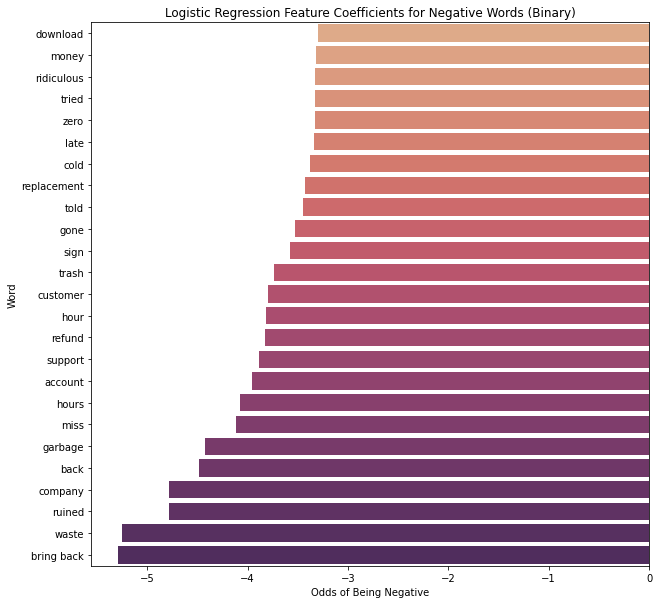

In [127]:
# Create bar plot of feature coefficients for binary negative as log odds
barplot_series(lr_bin_neg2, 
               "Logistic Regression Feature Coefficients for Negative Words (Binary)", 
               "Odds of Being Negative", "Word", 'flare')

## Recommendation
1. **Focus on building an impressive UI/UX.** From the coefficient analysis for positive words, it was evident that users were happy when using an app that was easy to use. Nowadays where there is too much information to consume, people prefer convenience and simplicity. Therefore, it is imperative to build an app that is not too complicated to use. 

2. **Build a strong delivery operations system.** There were many words present in both coefficient analysis for positive and negative words, which means that 'delivery' is a feature that can easily influence a user's sentiment. In terms of operations, it is important that there are enough drivers ready and available to complete delivery without any delays. 

3. **Food quality matters.** Even though the users know that it will take longer for their food to arrive when ordering in than dining in, they still expect their food to be kept hot/cold and delicious. Therefore, I highly recommend working with restaurants on how to adjust their cooking method and packaging to serve with the best quality.

4. **No more additional charges please!** It is quite common to see additional charges being applied when ordering delivery these days. However, it was evident from our analysis that people are more likely to leave bad reviews when this happens. While additional cost is unavoidable, we should seek a way to minimize the cost more competitively.

5. **Easy access customer service.** When something goes wrong, it could be quite frustrating when it is difficult to reach the customer service. Not to mention that the quality of customer service is important, users should be able to reach the customer service without any difficulty. For example, there can be a button for customer service and giving an option to either call or email immediately about an food/delivery on the order summary page. 

6. **Users don't like refunds!** While it makes sense to provide a refund when an order wasn't delivered on time or accurately, refunds are what the customers want. When placing an order through an app, users expect the correct items to be delivered on time. They are excited and hungry while waiting for their food, and it should be understandable that it could be a very disappointing experience when it gets to a point where they must receive a refund.

## Next Steps
1. Our data is currently limited to the reviews and ratings on the Apple App Store. Collecting and analyzing app reviews from the Google Play Store to examine how they compare would help us get a well-rounded idea of the sentiments of all mobile app users, as opposed to just Apple users.